In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# display all columns
pd.set_option('display.max_columns', None)

In [3]:
# load data from house-prices-advanced-regression-techniques
train_data= pd.read_csv('train.csv')

In [4]:
train_data.shape

(1460, 81)

In [5]:
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## 2. Target variable analysis

In [7]:
train_data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

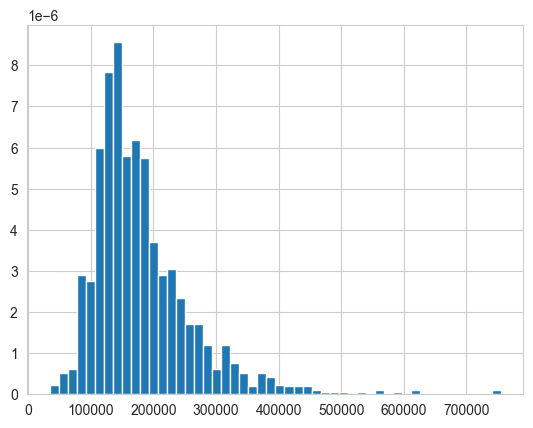

In [8]:
train_data.SalePrice.hist(bins=50, density=True);

We can see that the target variable is not normally distributed. We can use log transformation to make it more normally distributed.

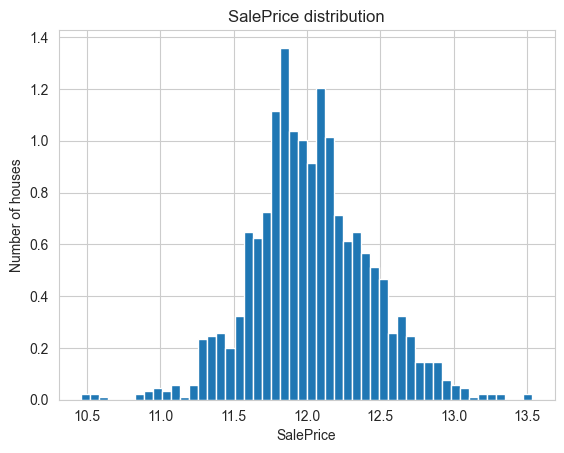

In [9]:
np.log(train_data['SalePrice']).hist(bins=50, density=True);
plt.ylabel('Number of houses')
plt.xlabel('SalePrice')
plt.title('SalePrice distribution');
plt.show();

## 3. Variable analysis
let's identify the categorical and numerical variables. Usually pandas shows categorical variables as objects, but we can check the number of unique values to be sure.

In [10]:
cat_vars = [var for var in train_data.columns if train_data[var].dtype=='O']

In [11]:
len(cat_vars)

43

We have MSSubClass, which is a categorical variable, but it is stored as a number. Let's add it to the list of categorical variables.

In [12]:
cat_vars.append('MSSubClass')
len(cat_vars)

44

let's check the number of numerical variables


In [13]:
num_vars = [var for var in train_data.columns if var not in cat_vars]

In [14]:
len(num_vars)

37

In [15]:
total_vars = len(cat_vars) + len(num_vars)

In [16]:
total_vars == len(train_data.columns)

True

# 3. Missing values
lets check the percentage of missing values in each variable

In [17]:
vars_with_na = [var for var in train_data.columns if train_data[var].isnull().sum()>0]

In [18]:
len(vars_with_na)

19

In [19]:
# determine the percentage of missing values
# display the variables with missing values in descending order
train_data[vars_with_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

let's visualize the missing values

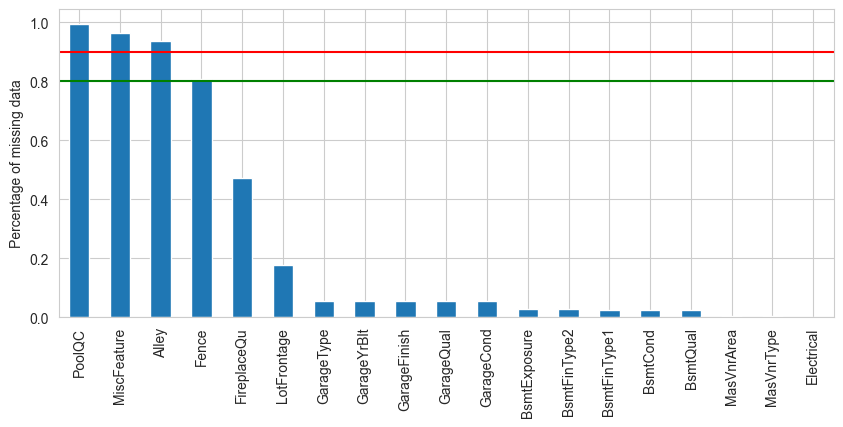

In [20]:
# draw a plot of the missing values
train_data[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10,4))
plt.ylabel('Percentage of missing data')
# draw a line at 90
plt.axhline(y=.9, color='r', linestyle='-');
plt.axhline(y=.8, color='g', linestyle='-');


In [22]:
print("Number of variables with missing values: ", len(vars_with_na))
print("Number of variables with more than 90% missing values: ", len([var for var in vars_with_na if train_data[var].isnull().mean()>0.9]))
print("Number of variables with more than 80% missing values: ", len([var for var in vars_with_na if train_data[var].isnull().mean()>0.8]))

Number of variables with missing values:  19
Number of variables with more than 90% missing values:  3
Number of variables with more than 80% missing values:  4
Number of numeric variables with missing values:  3


In [23]:
print("Number of numeric variables with missing values: ", len([var for var in vars_with_na if var in num_vars]))
print('Number of numeric variables with 50% of missing values: ', len([var for var in vars_with_na if var in num_vars and train_data[var].isnull().mean()>0.5]))

Number of numeric variables with missing values:  3
Number of numeric variables with 50% of missing values:  0


In [25]:
# print numerical values variable names with missing data
for var in vars_with_na:
    if var in num_vars:
        print(var, train_data[var].isnull().mean())

LotFrontage 0.1773972602739726
MasVnrArea 0.005479452054794521
GarageYrBlt 0.05547945205479452


In [26]:
# print categorical values variable names with missing data

In [27]:
for var in vars_with_na:
    if var in cat_vars:
        print(var, train_data[var].isnull().mean())

Alley 0.9376712328767123
MasVnrType 0.005479452054794521
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinType2 0.026027397260273973
Electrical 0.0006849315068493151
FireplaceQu 0.4726027397260274
GarageType 0.05547945205479452
GarageFinish 0.05547945205479452
GarageQual 0.05547945205479452
GarageCond 0.05547945205479452
PoolQC 0.9952054794520548
Fence 0.8075342465753425
MiscFeature 0.963013698630137


In [28]:
# let's evaluuate the price of the houses in those observations with missing values. We will do this for each variable with missing values

In [33]:
def analyse_na_value(df, var):
    df = df.copy()
    # add a binary missing indicator
    df[var] = np.where(df[var].isnull(), 1, 0)
    # let's calculate the mean SalePrice where the information is missing or present
    tmp = df.groupby(var)['SalePrice'].agg(['mean', 'std'])
    tmp.plot(kind='barh', y='mean', yerr='std', legend=False)
    plt.title(var)
    plt.show();


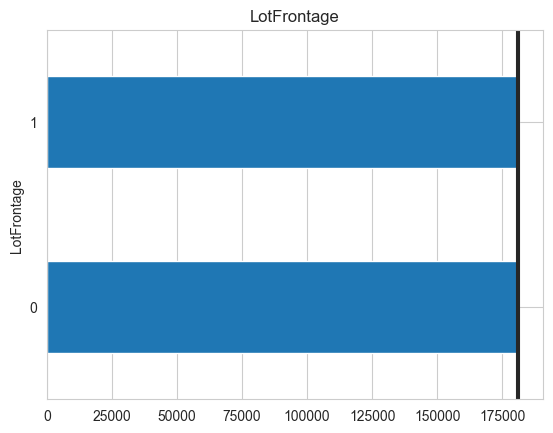

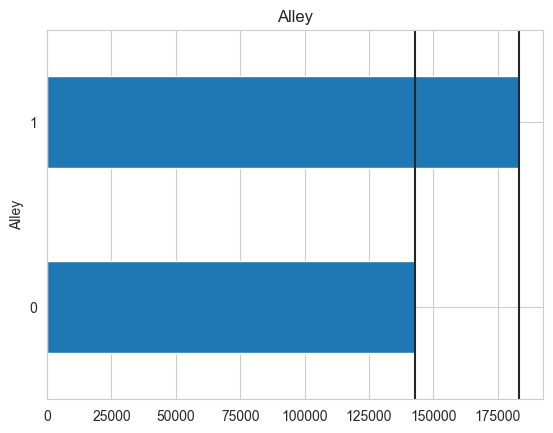

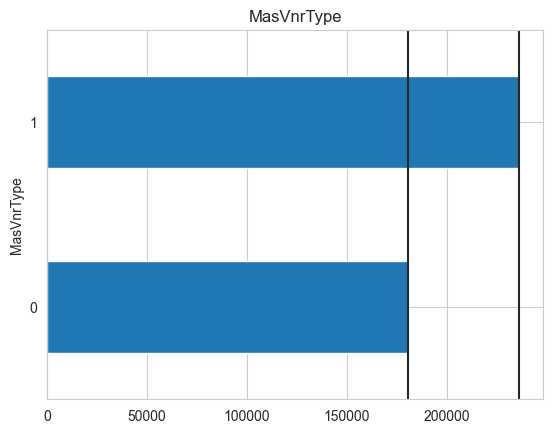

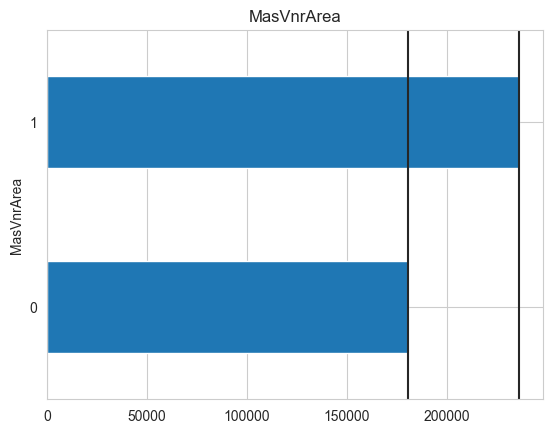

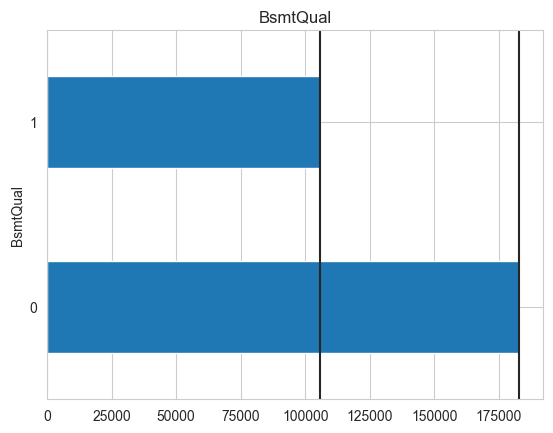

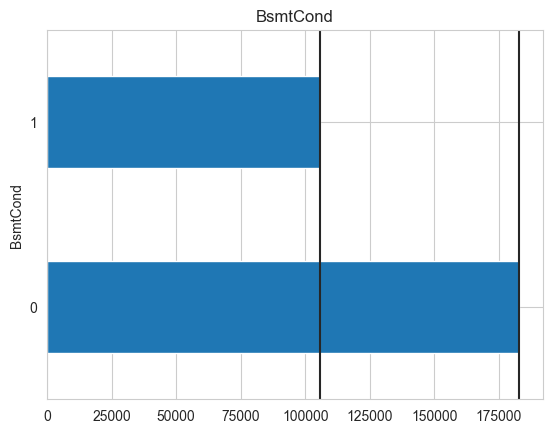

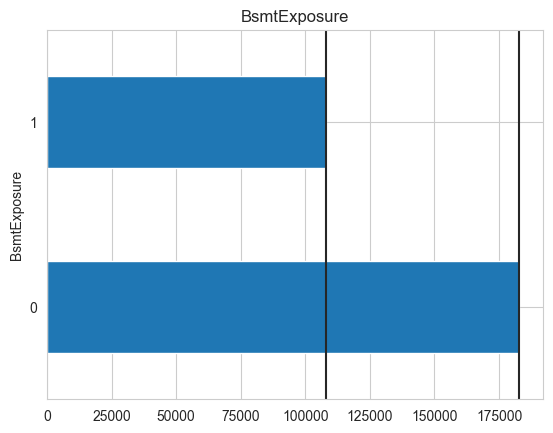

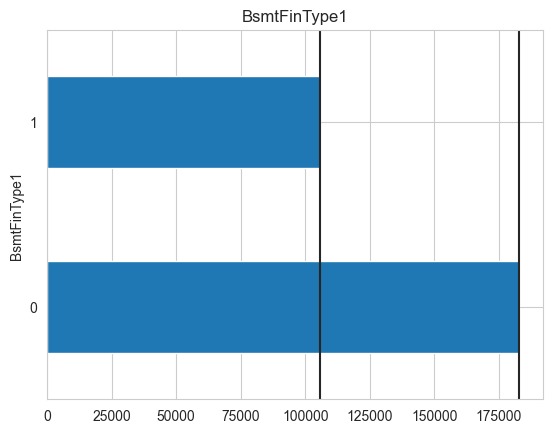

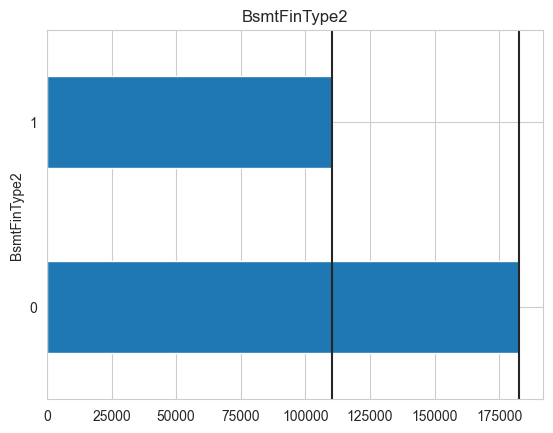

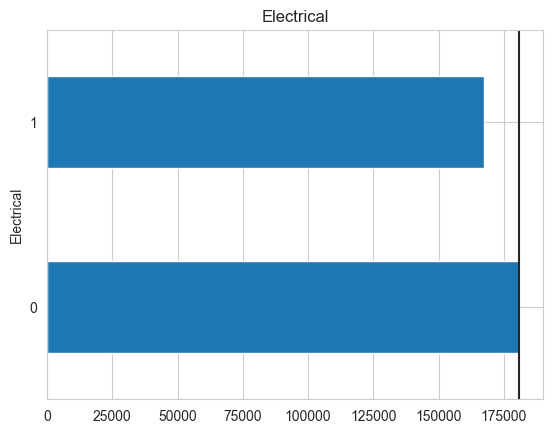

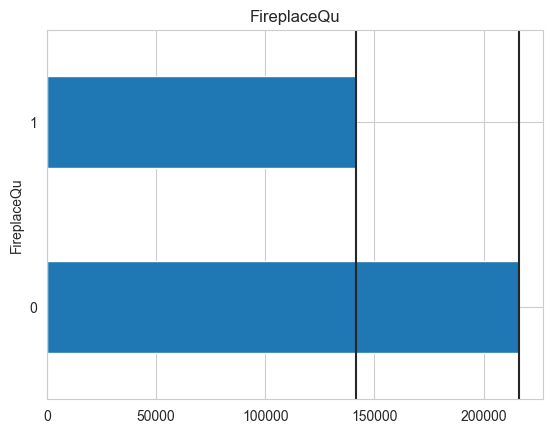

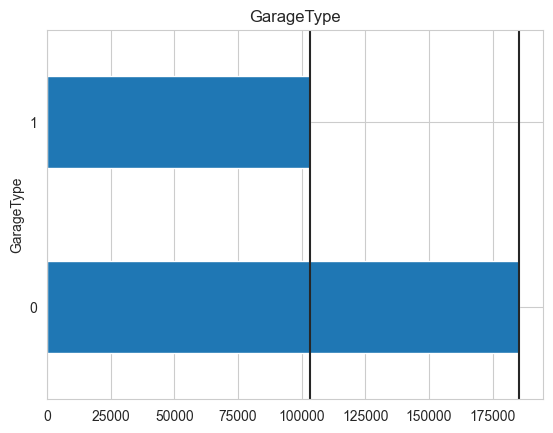

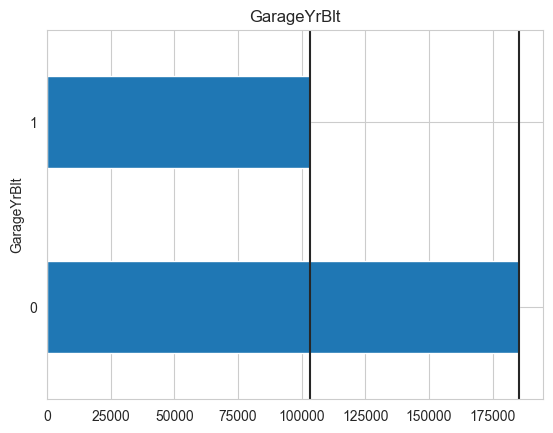

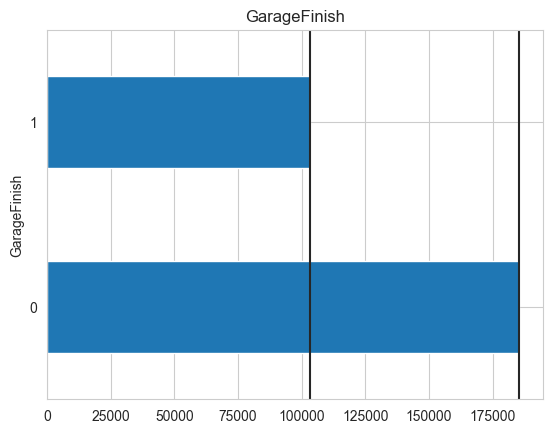

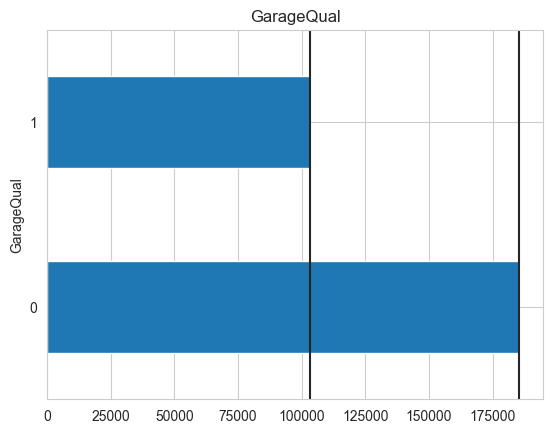

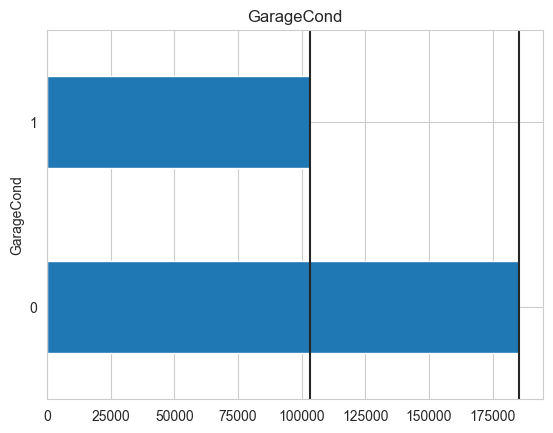

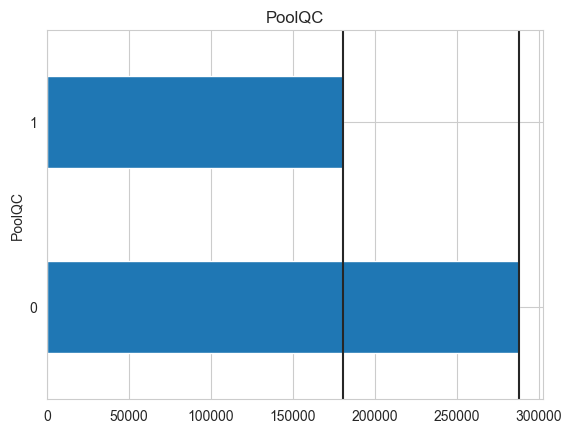

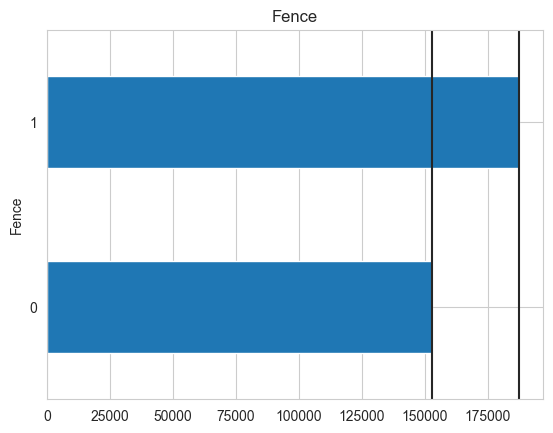

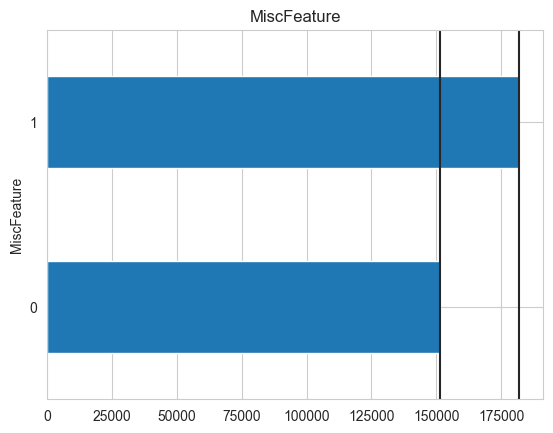

In [34]:
for var in vars_with_na:
    analyse_na_value(train_data, var)

we can see how in some variables the price of the houses is higher when the information is missing. This is a good indication that the missing values are not missing at random. We will explore this further in the next section.

# 4. Numerical variables

let's go ahead and find out what numerical values we have in the dataset

In [38]:
train_data[num_vars].head()

Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1         65.0     8450            7            5       2003   
1   2         80.0     9600            6            8       1976   
2   3         68.0    11250            7            5       2001   
3   4         60.0     9550            7            5       1915   
4   5         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

We generally don't use date variables in machine learning models; Instead we extract information from them. For example, we can extract the year from the date and use it as a numerical variable. We will do this in the next section. We can also caputure the difference in years between the year the house was built and the year it was sold. We will do this in the next section as well.

In [39]:
year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [40]:
# let's explore the content of these variables
for var in year_vars:
    print(var, train_data[var].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

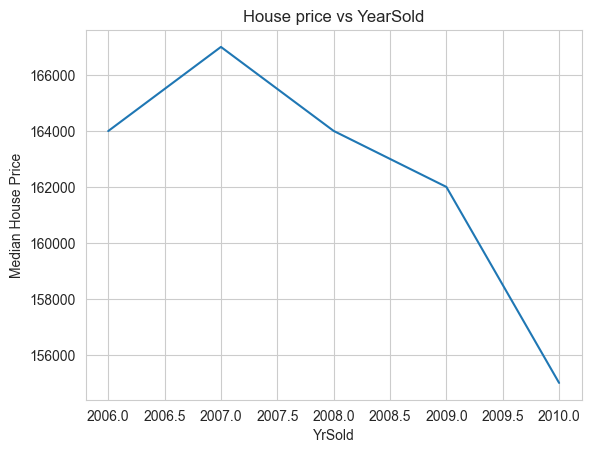

In [45]:
# we can explore the evolution of the sale price with the years the house was sold
train_data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')
plt.title('House price vs YearSold');

we can see after 2007 there is a drop in the price of the houses. This is probably due to the economic crisis that started in 2008. We can also see that the price of the houses is higher in 2006 and 2007. This is probably due to the fact that the houses were built in the previous years.

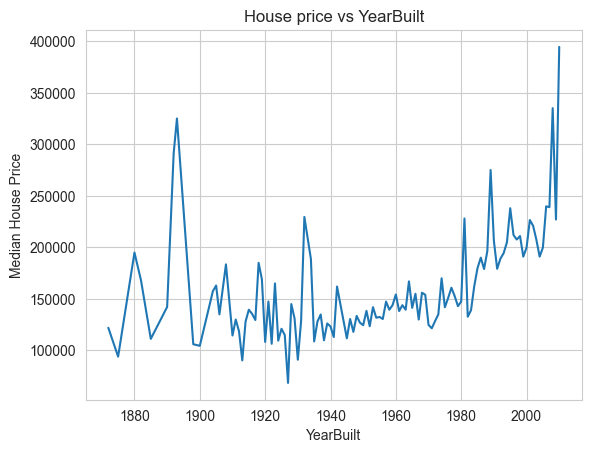

In [47]:
# let's explore the relationship between the year the house was built and the sale price

train_data.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Median House Price')
plt.title('House price vs YearBuilt');


we can see that the price of the houses is higher when they were built in the previous years. This is probably due to the fact that the houses were built in the previous years.

Could it be that lately most houses sold were old? Let's explore this.

In [49]:
def analyse_year_vars(df, var):
    df = df.copy()
    df[var] = df['YrSold'] - df[var]

    df.groupby("YrSold")[var].median().plot()
    plt.ylabel('Time from: ' + var)
    plt.show();

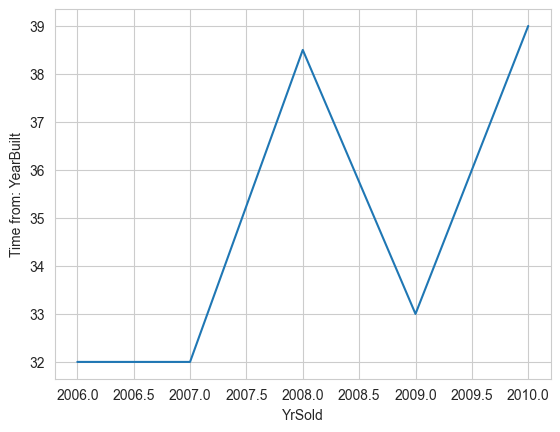

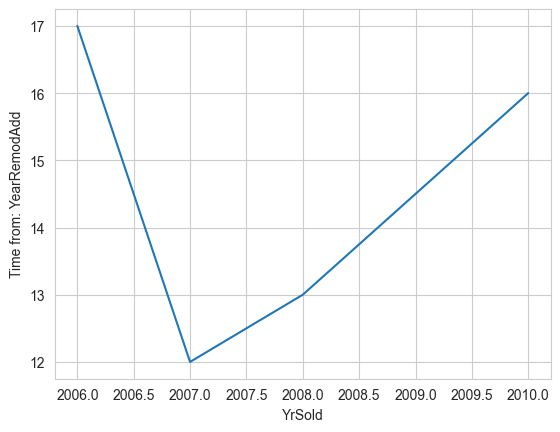

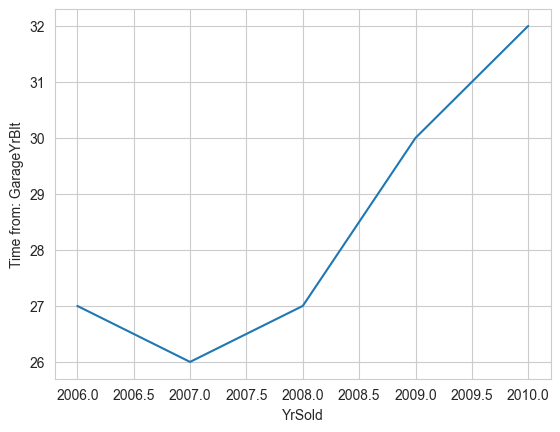

In [50]:
for var in year_vars:
    if var != 'YrSold':
        analyse_year_vars(train_data, var)

we can see that the time from each variable and the time of sell is getting longer, which means that the houses sold are older. it is only between 2008 and 2009 that the time from the year the house was built and the year it was sold is shorter. This is probably due to the economic crisis.

In [53]:
def plot_difference_between_year_sold_and_var_vs_price(df, var):
    df = df.copy()
    df[var] = df['YrSold'] - df[var]

    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show();

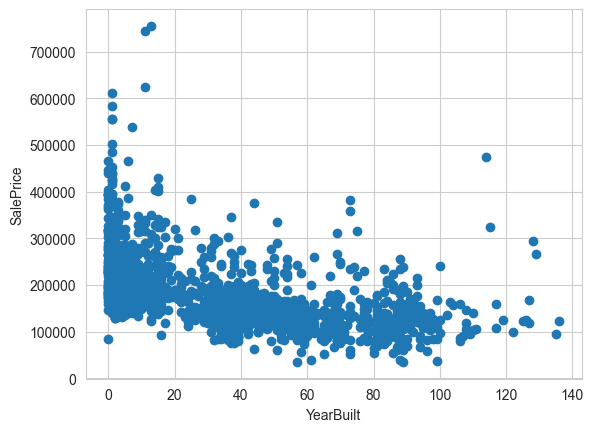

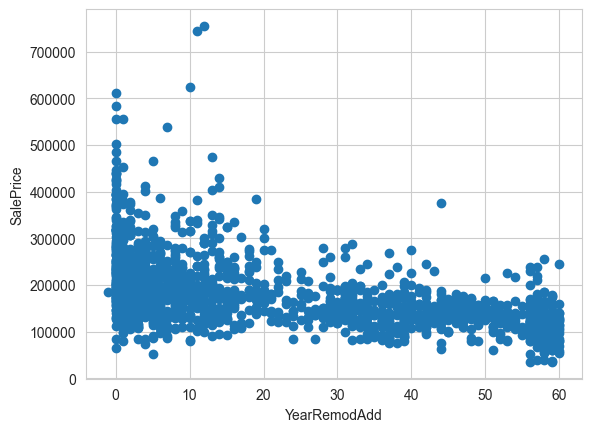

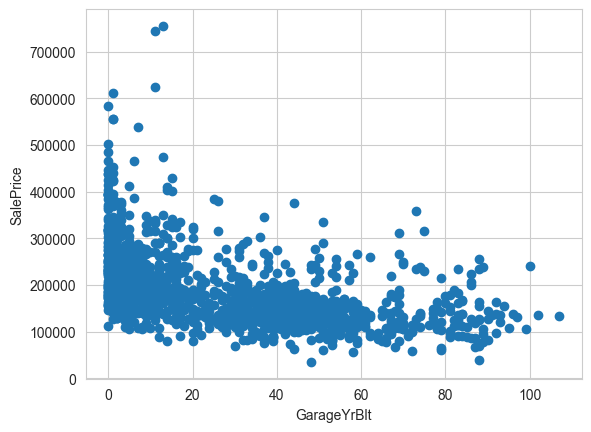

In [54]:
for var in year_vars:
    if var != 'YrSold':
        plot_difference_between_year_sold_and_var_vs_price(train_data, var)

## 4.2 Discrete variables
let's go ahead and find out what discrete values we have in the dataset

In [62]:
discrete_vars = [var for var in num_vars if len(train_data[var].unique())<20 and var not in year_vars]
discrete_vars


['OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold']

In [63]:
print("Number of discrete vars: ", len(discrete_vars))


Number of discrete vars:  13


In [65]:
train_data[discrete_vars].head()

OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0            7            5             1             0         2         1   
1            6            8             0             1         2         0   
2            7            5             1             0         2         1   
3            7            5             1             0         1         0   
4            8            5             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  PoolArea  \
0             3             1             8           0           2         0   
1             3             1             6           1           2         0   
2             3             1             6           1           2         0   
3             3             1             7           1           3         0   
4             4             1             9           1           3         0   

   MoSold  
0       2  
1       5  
2       9  
3       2  
4      12

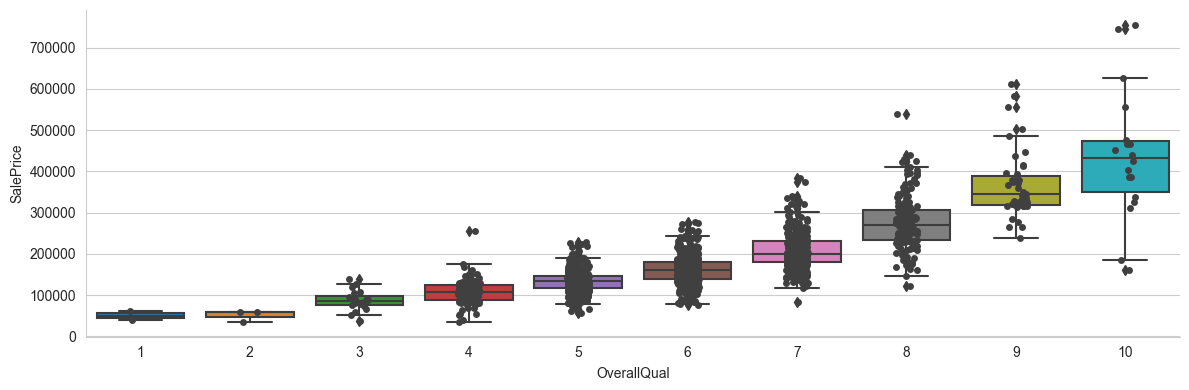

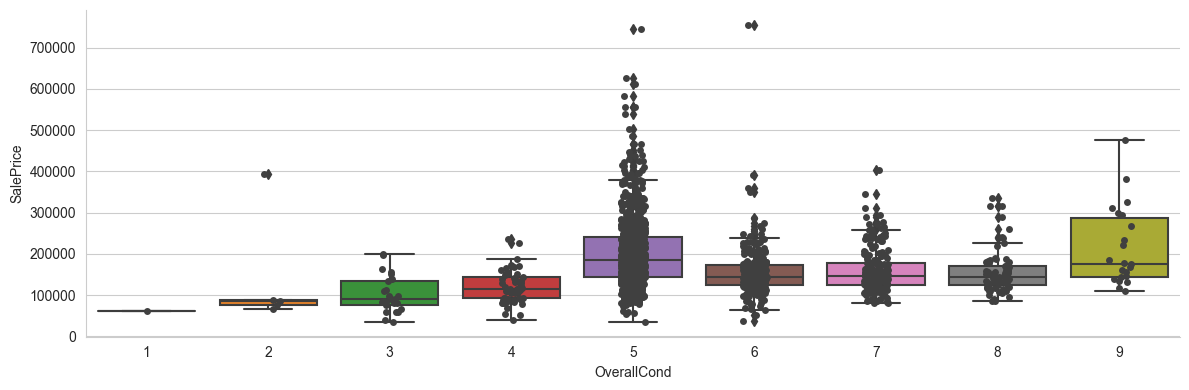

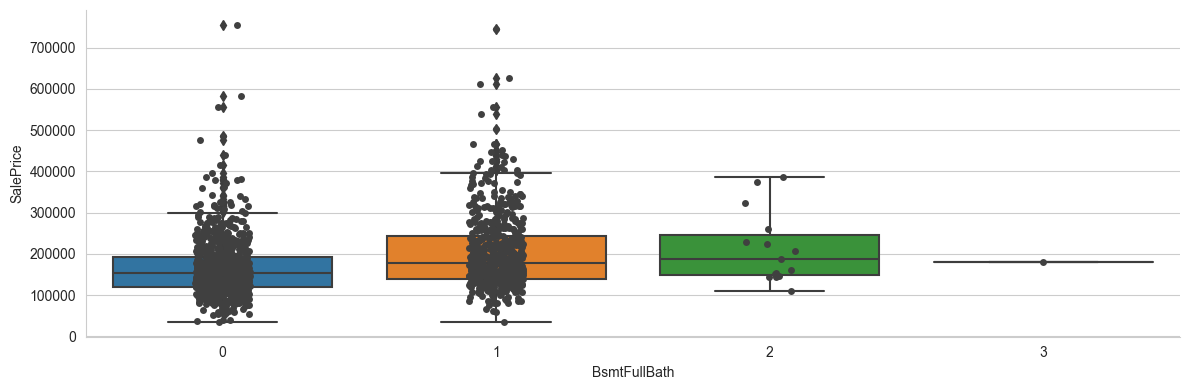

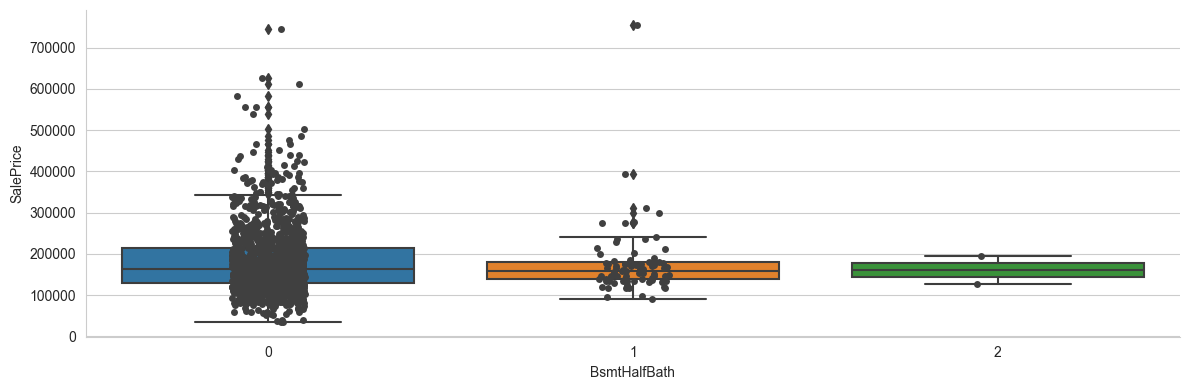

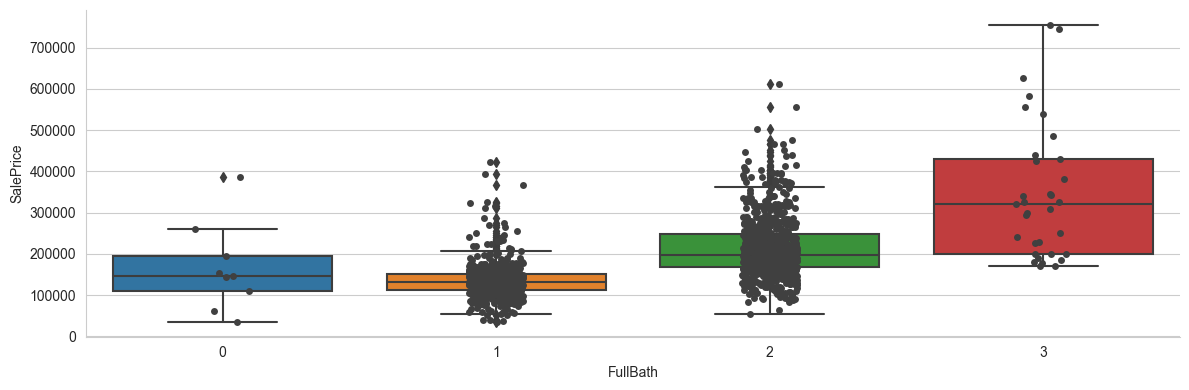

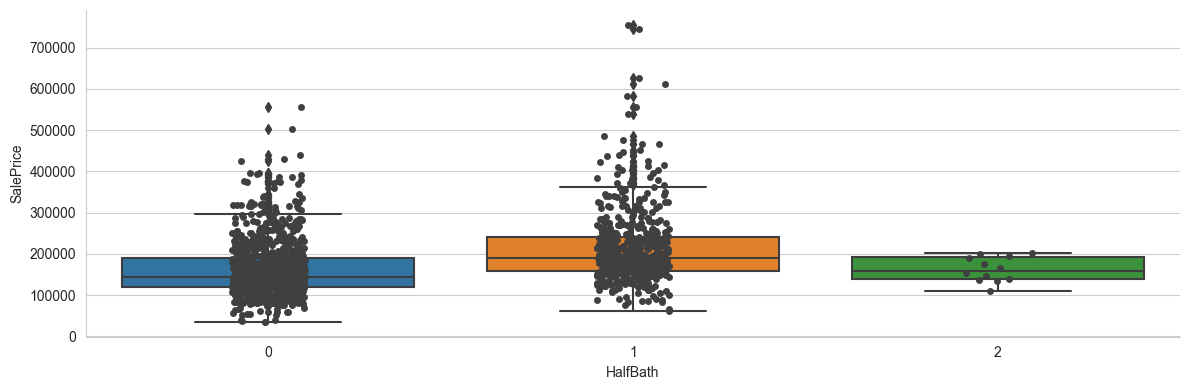

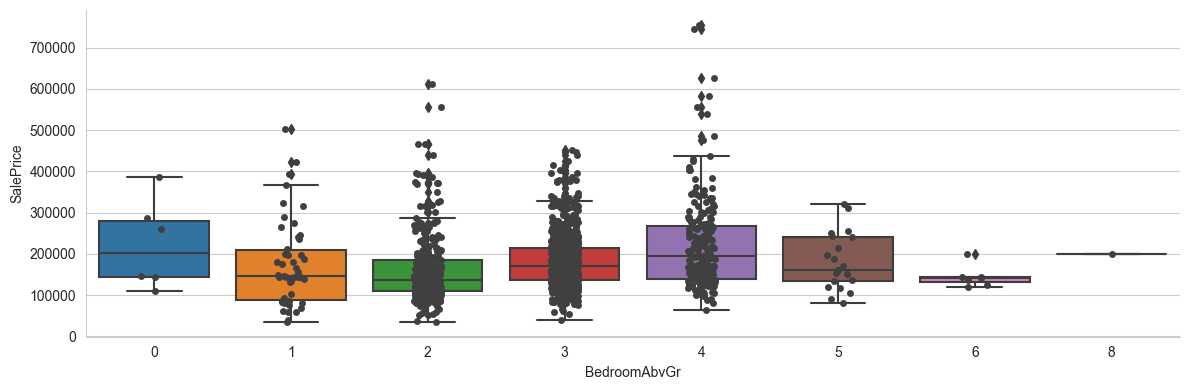

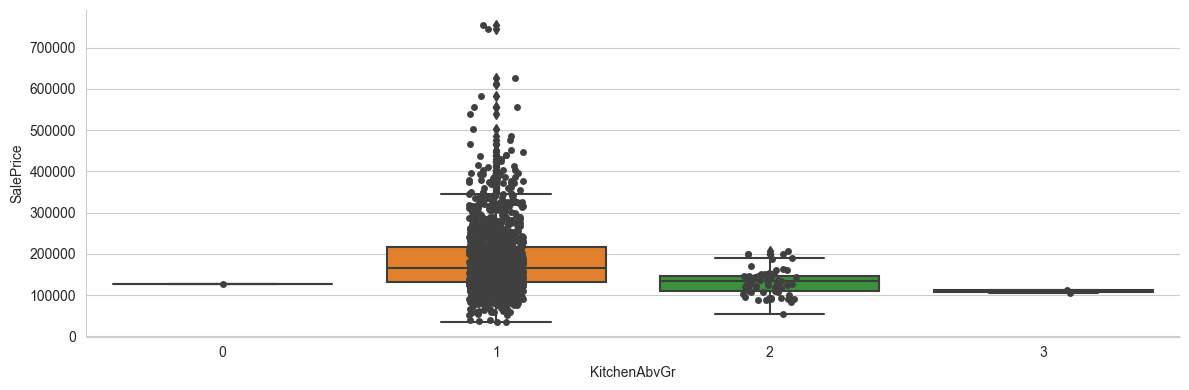

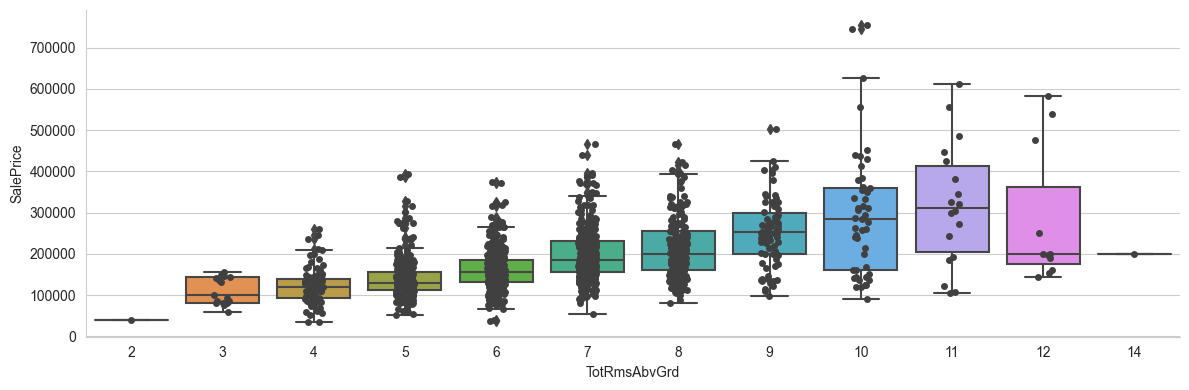

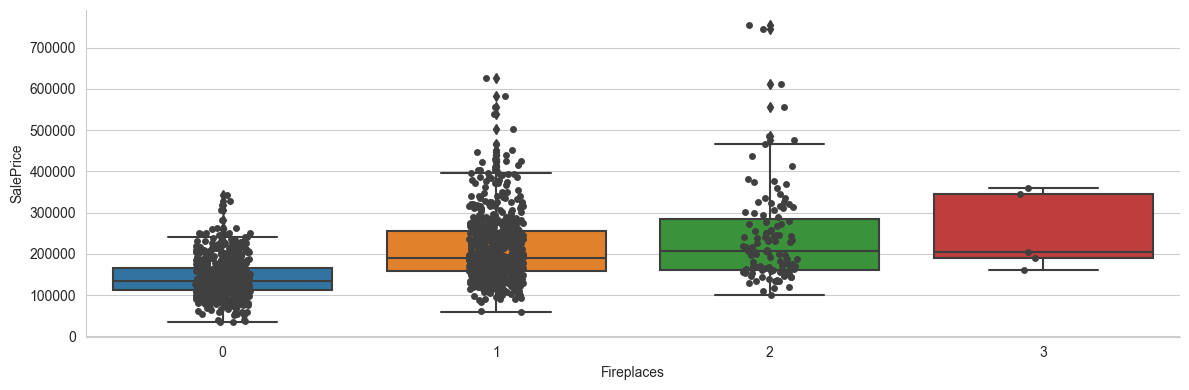

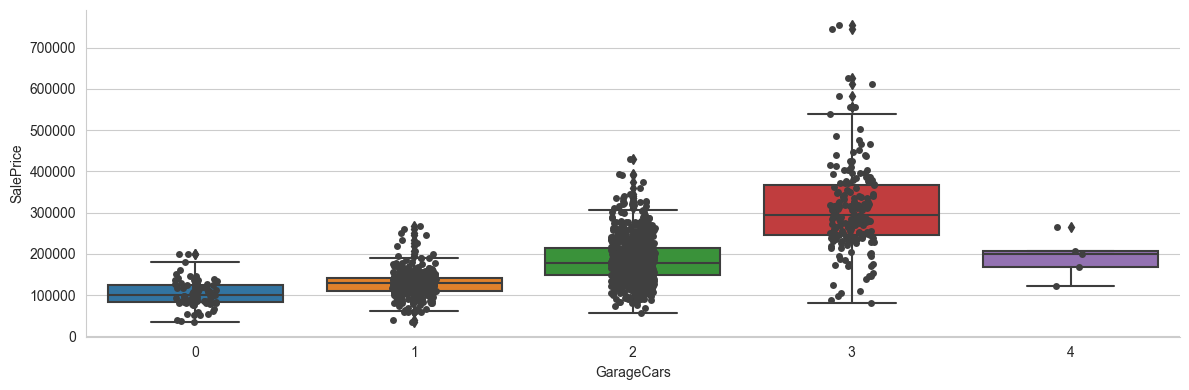

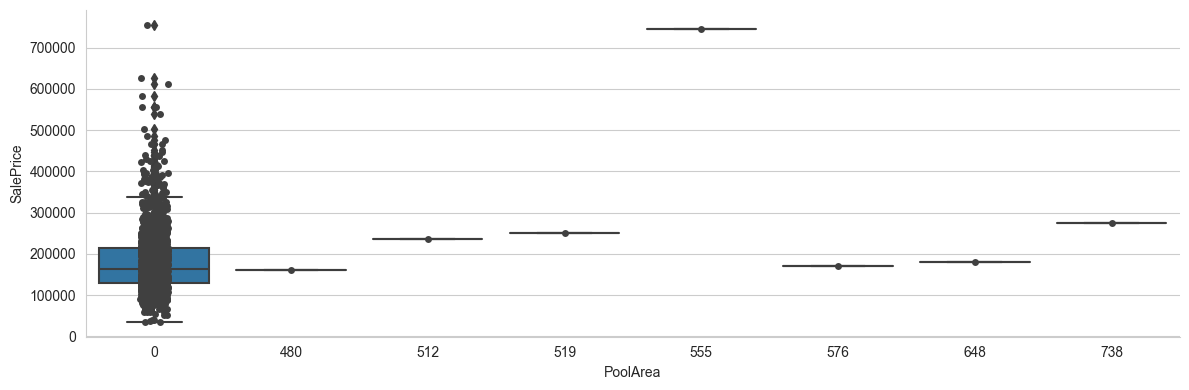

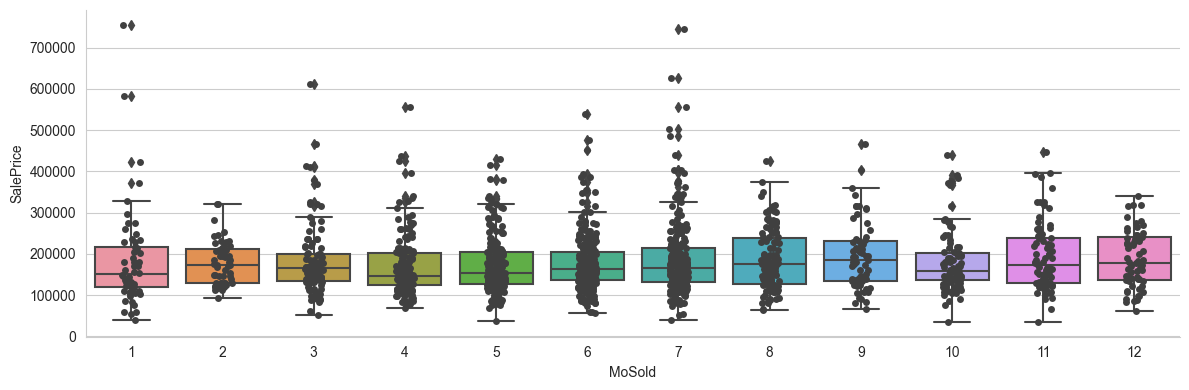

In [66]:
for var in discrete_vars:
    sns.catplot(x=var, y='SalePrice', data=train_data, kind='box', height=4, aspect=3)
    sns.stripplot(x=var, y='SalePrice', data=train_data, jitter=True, color='0.25')
    plt.show();

## 4.3 Continuous variables
let's plot histograms to visualise the distribution of the continuous variables


In [67]:
continuous_vars = [var for var in num_vars if var not in discrete_vars and var not in year_vars]

In [68]:
print("Number of continuous vars: ", len(continuous_vars))

Number of continuous vars:  20


In [69]:
train_data[continuous_vars].head()

Id  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0   1         65.0     8450       196.0         706           0        150   
1   2         80.0     9600         0.0         978           0        284   
2   3         68.0    11250       162.0         486           0        434   
3   4         60.0     9550         0.0         216           0        540   
4   5         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  \
0           0           61              0          0            0        0   
1         298            0              0          0            0        0   
2           0           42              0          0            0        0   
3           0           35            272          0            0        0   
4         192           84              0          0            0        0   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

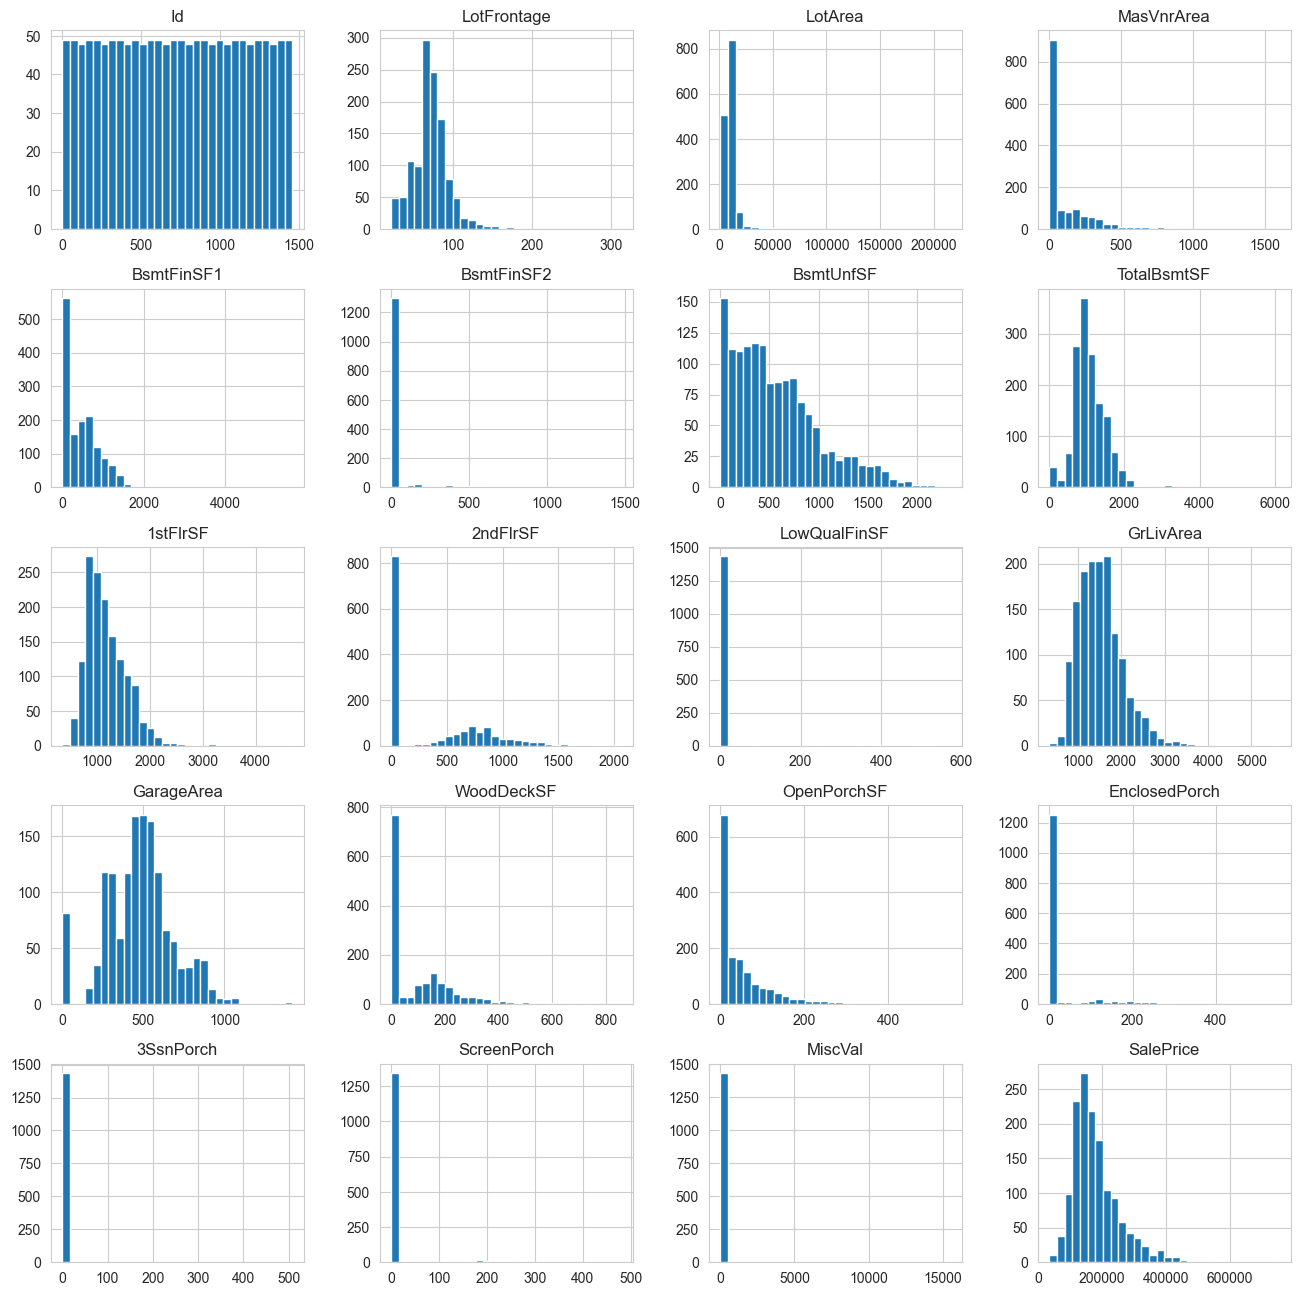

In [70]:
train_data[continuous_vars].hist(bins=30, figsize=(16, 16));

In [71]:
# first make a list with the super skewed variables
# for later

skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

In [72]:
# capture the remaining continuous variables

cont_vars = [
    'LotFrontage',
    'LotArea',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
]

In [73]:
# let's make Yeo-Johnson transformations

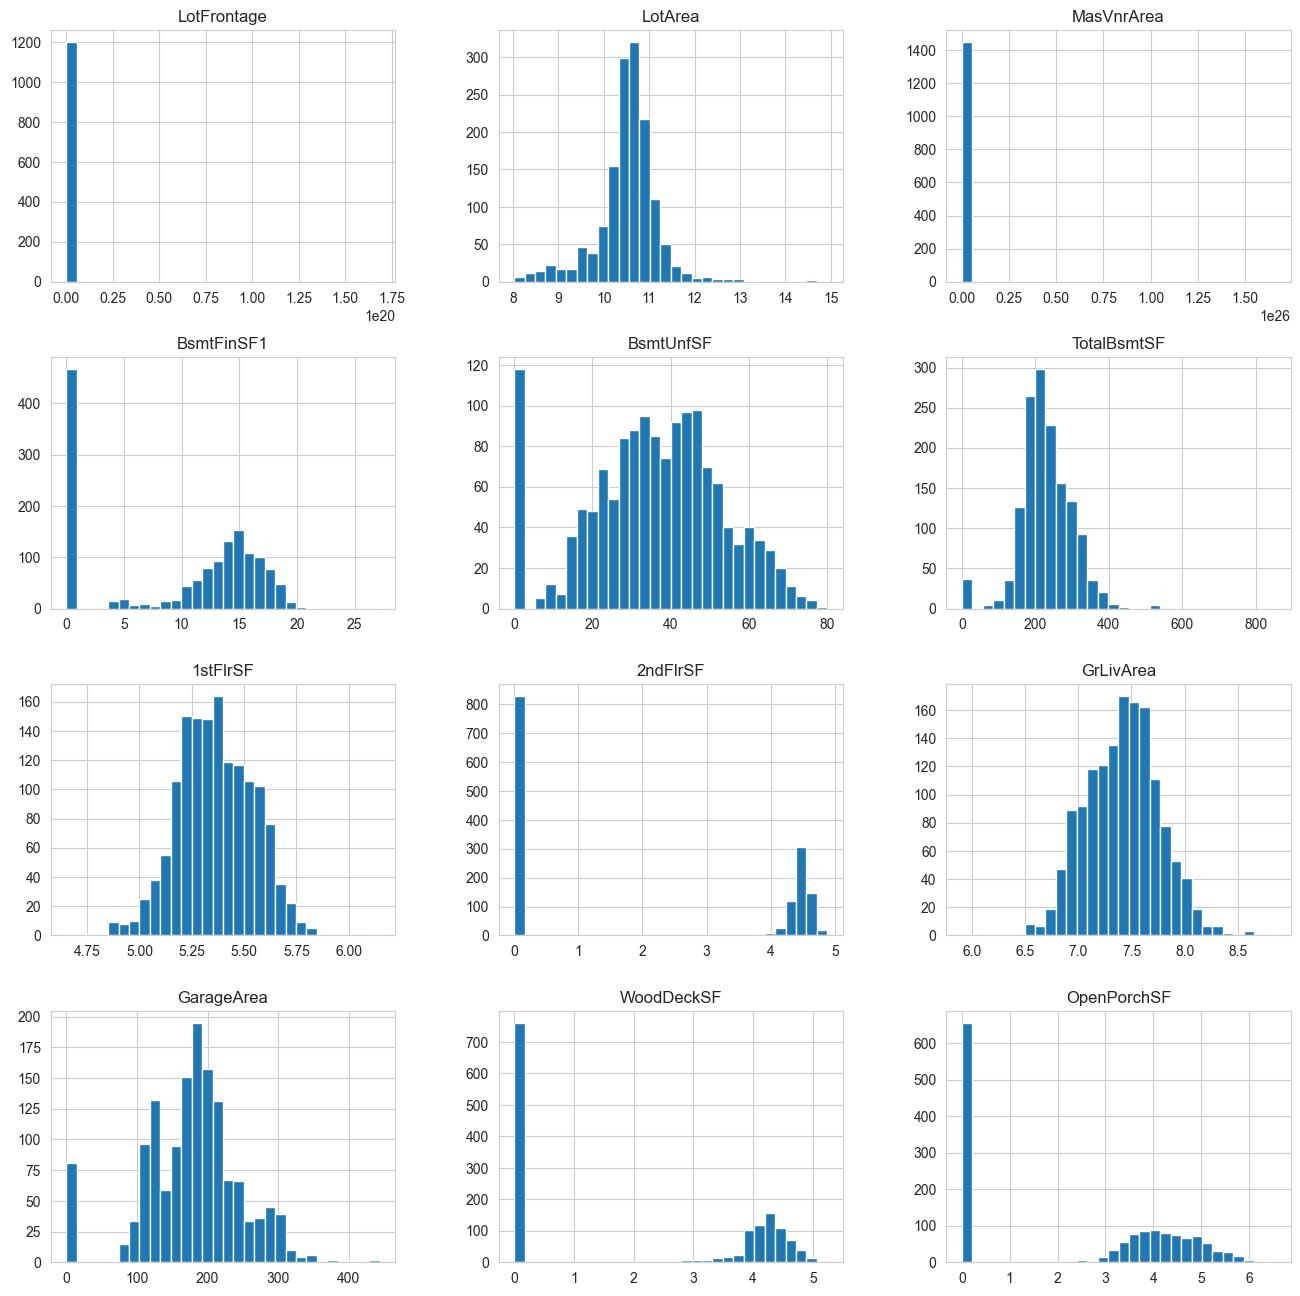

In [75]:
tmp = train_data.copy()
for var in cont_vars:
    tmp[var], param = stats.yeojohnson(train_data[var])
# plot the histograms
tmp[cont_vars].hist(bins=30, figsize=(16, 16));
plt.show();

For LotFrontage and MasVnrArea the transformation did not do an amazing job.

For the others, the values seem to be spread more evenly in the range.

Whether this helps improve the predictive power, remains to be seen. To determine if this is the case, we should train a model with the original values and one with the transformed values, and determine model performance, and feature importance. But that escapes the scope of this course.

Here, we will do a quick visual exploration here instead:

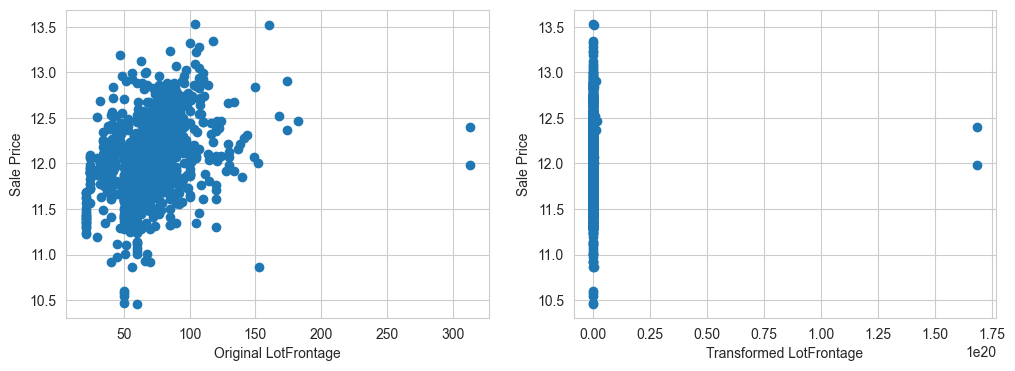

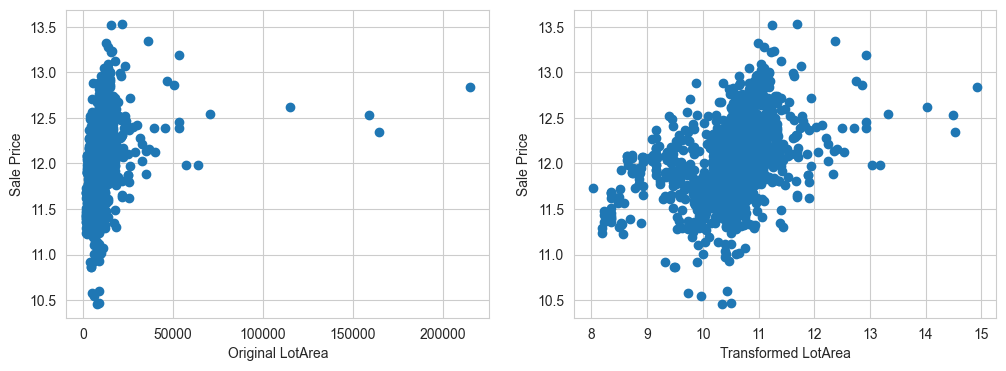

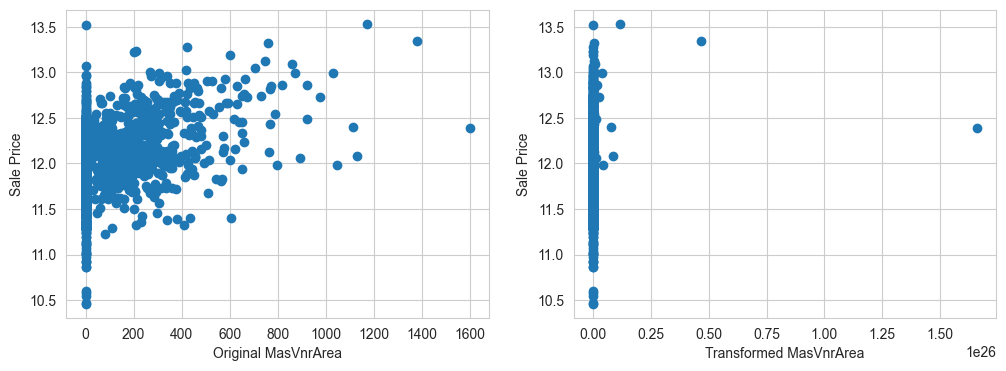

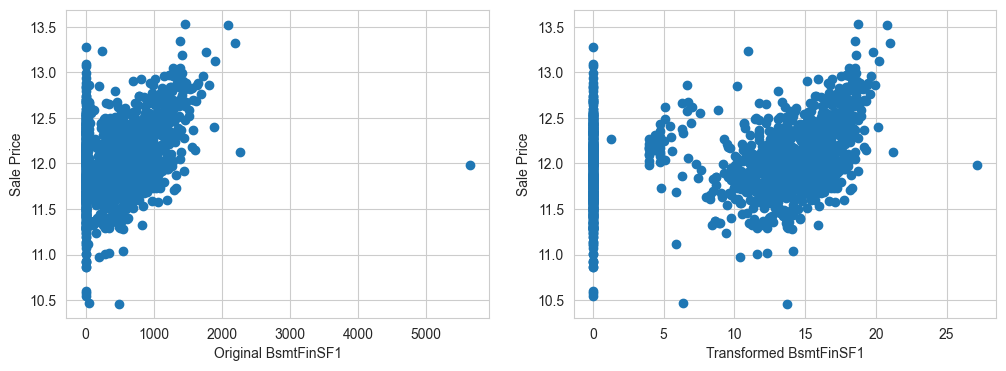

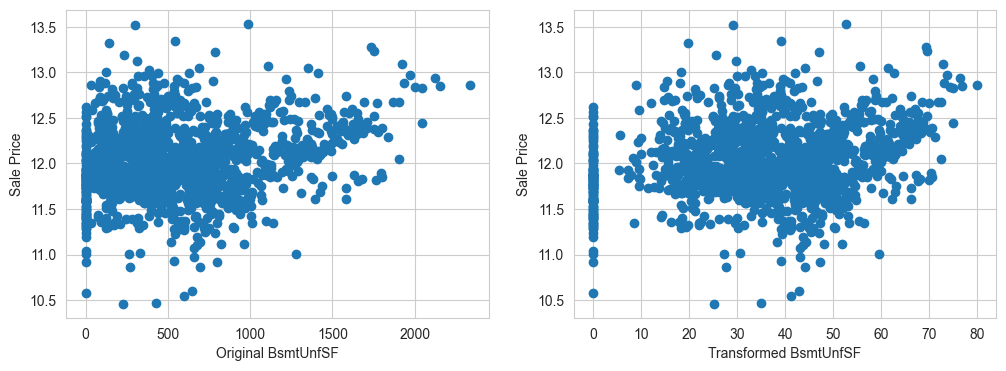

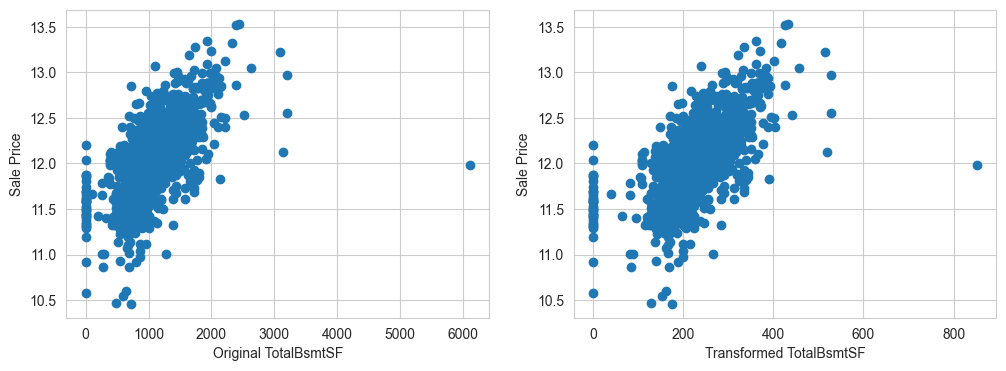

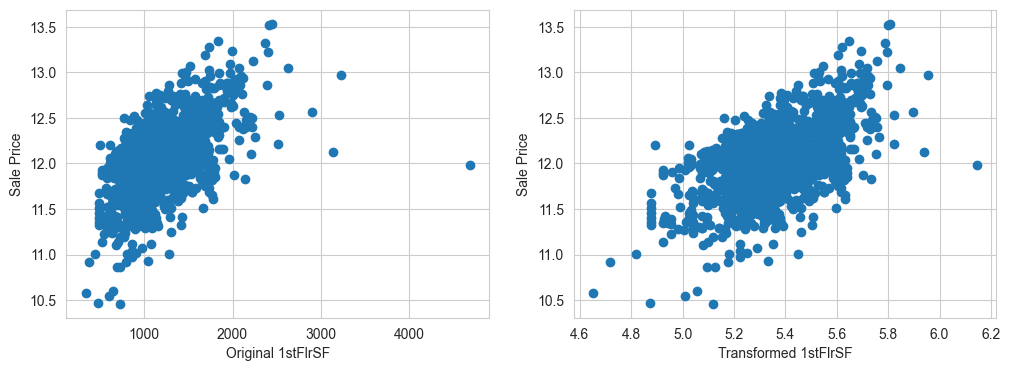

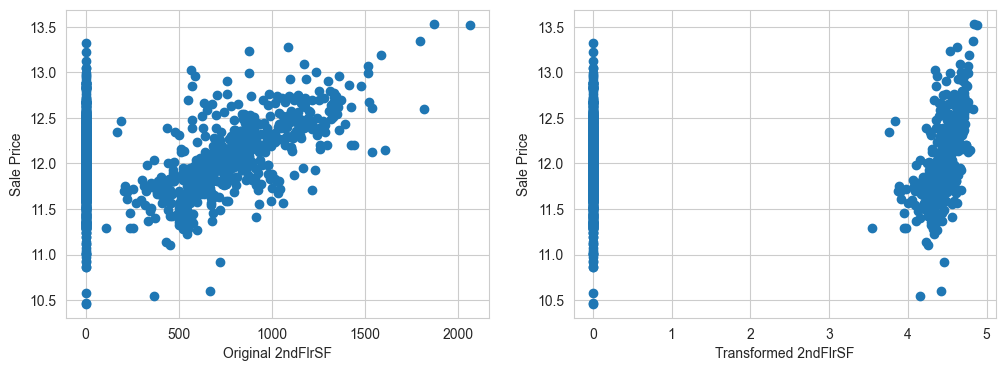

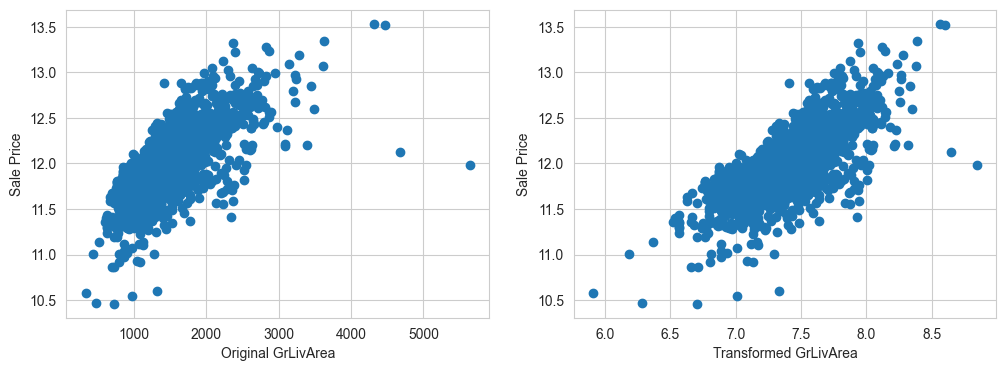

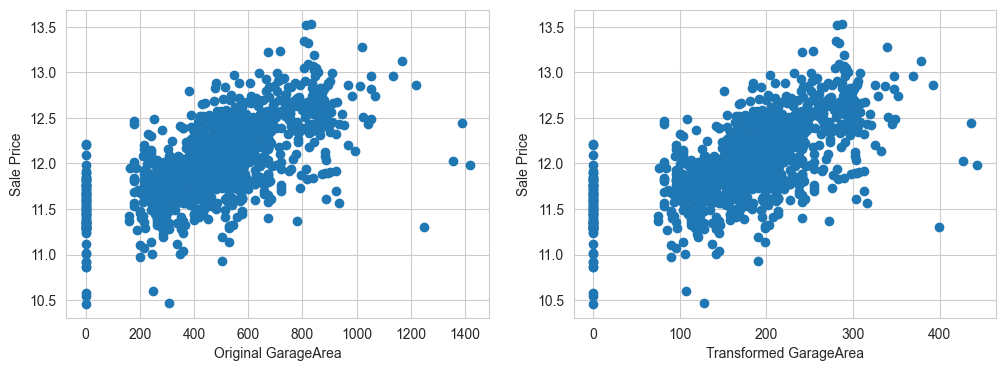

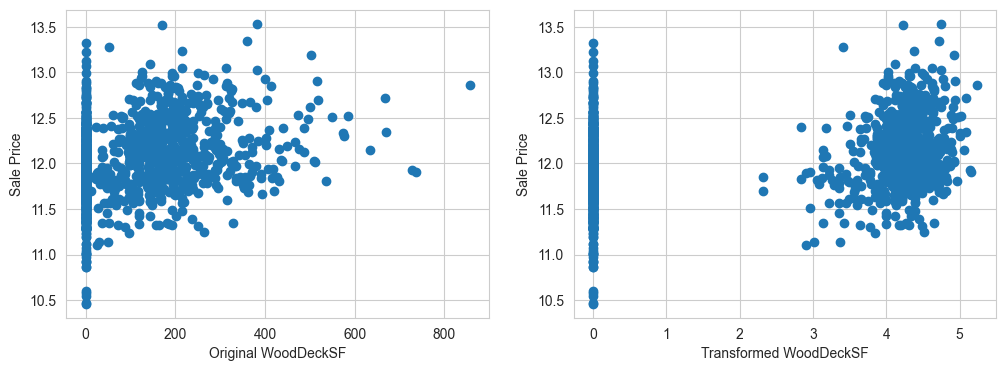

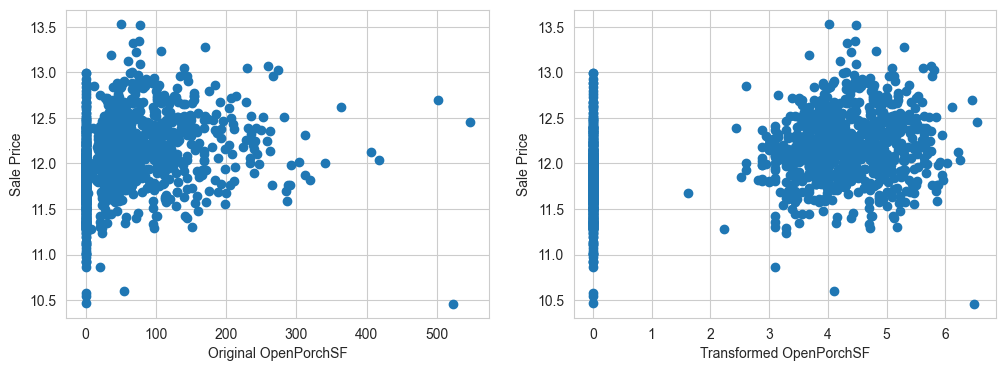

In [77]:
# let's plot the original or transformed variables
# vs sale price, and see if there is a relationship

for var in cont_vars:

    plt.figure(figsize=(12,4))

    # plot the original variable vs sale price
    plt.subplot(1, 2, 1)
    plt.scatter(train_data[var], np.log(train_data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)

    plt.show()

# 5 Number of labels
## 5.1 Cardinality
let's find out how many different categories there are in each of the categorical variables

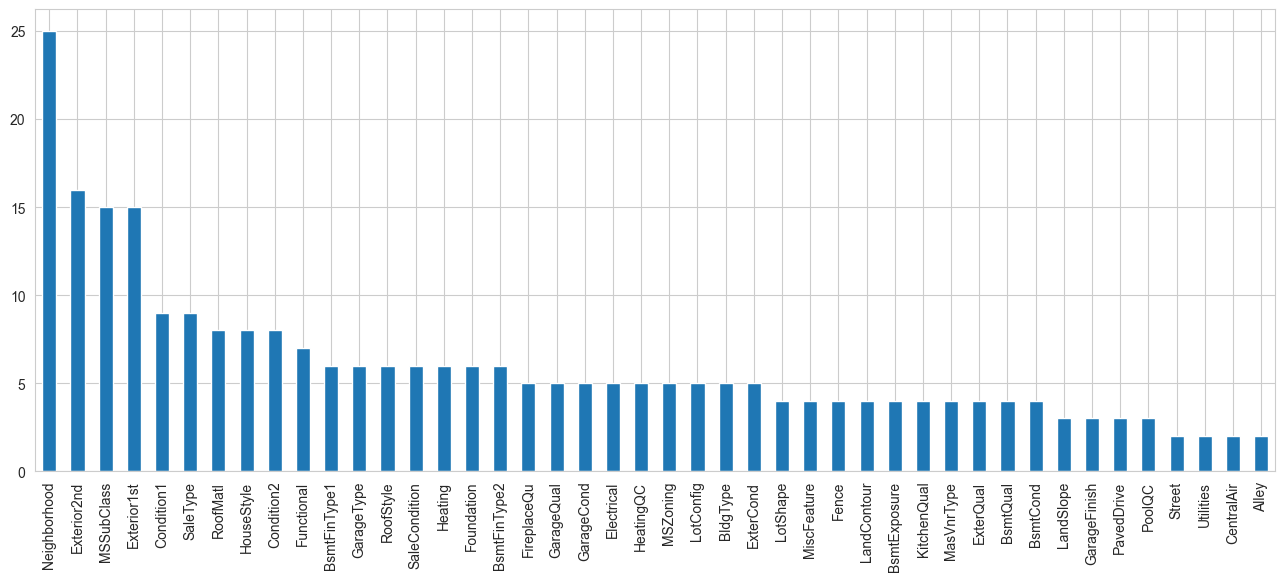

In [80]:
train_data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(16, 6));

## 5.2.Quality variables
There are a number of variables that refer to the quality of some aspect of the house, for example the garage, or the fence, or the kitchen. I will replace these categories by numbers increasing with the quality of the place or room.

The mappings can be obtained from the Kaggle Website. One example:

Ex = Excellent
Gd = Good
TA = Average/Typical
Fa = Fair
Po = Poor

In [81]:
# remap the quality variables
qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]
for var in qual_vars:
    train_data[var] = train_data[var].map(qual_mappings)


In [82]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}

var = 'BsmtExposure'

train_data[var] = train_data[var].map(exposure_mappings)

In [86]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    train_data[var] = train_data[var].map(finish_mappings)

In [87]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

train_data[var] = train_data[var].map(garage_mappings)

In [89]:
# capture all quality vars
qual_vars = qual_vars +  finish_vars + ['BsmtExposure', 'GarageFinish', 'Fence']

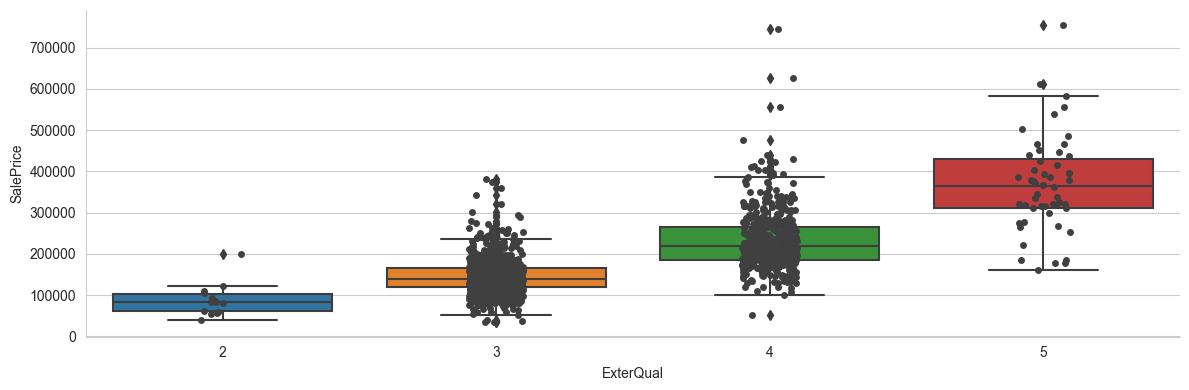

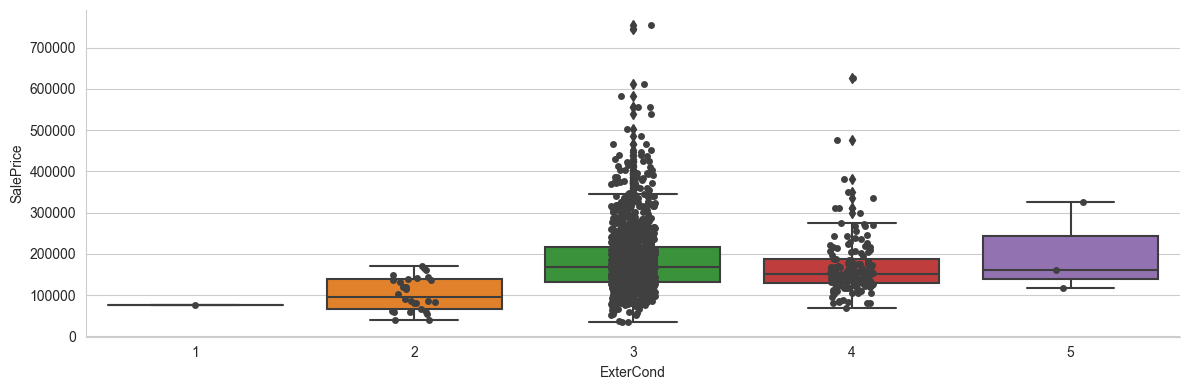

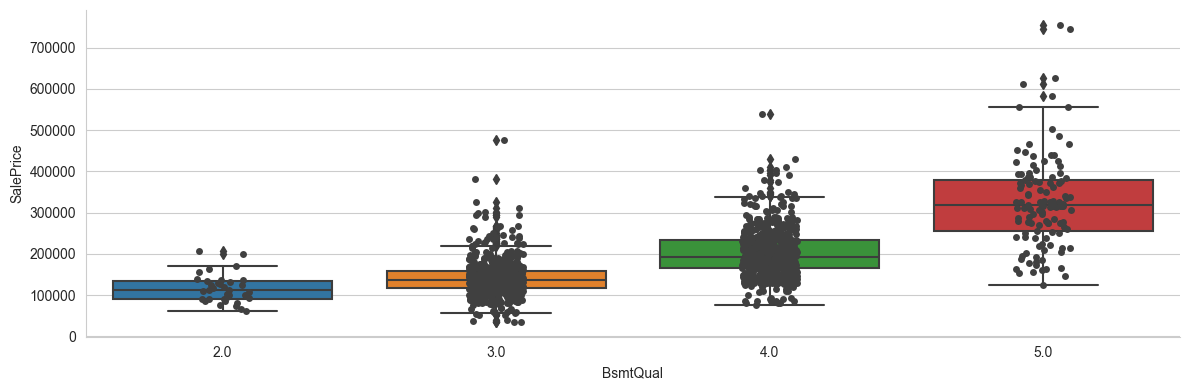

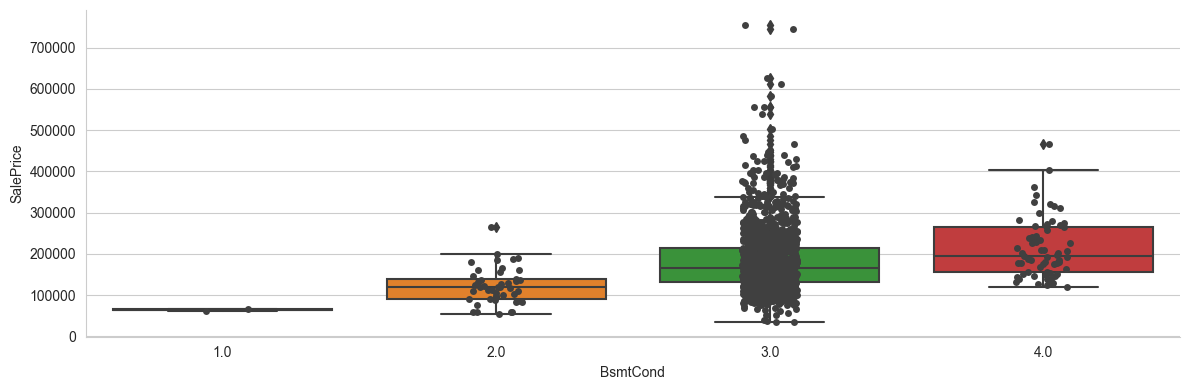

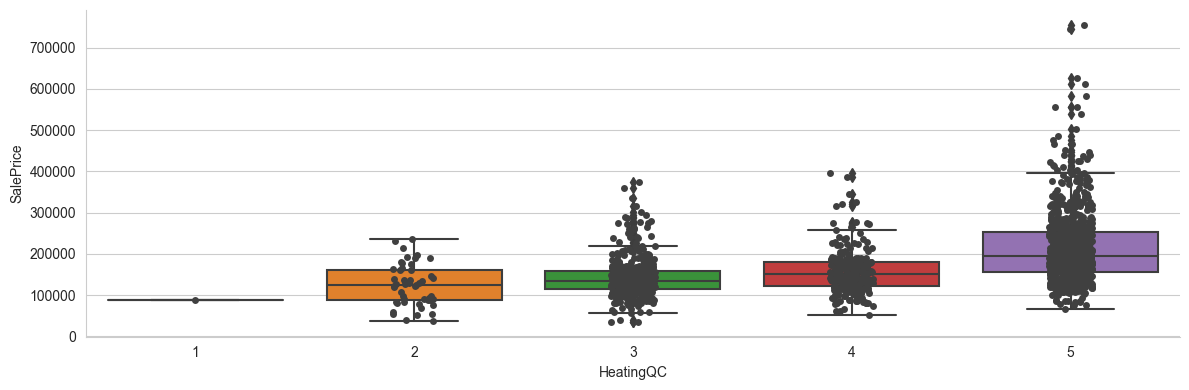

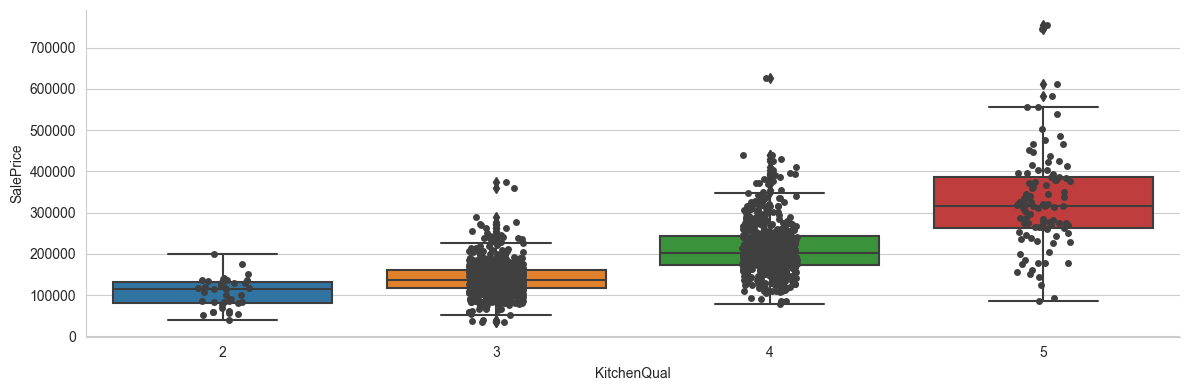

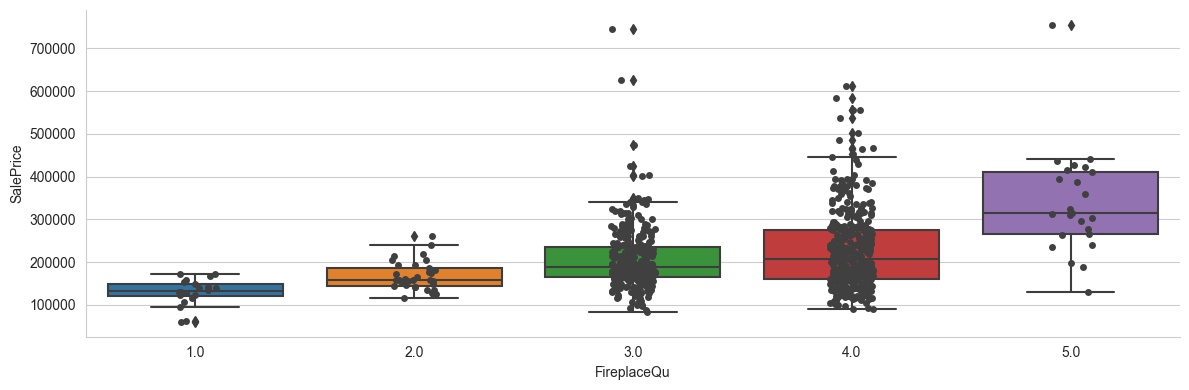

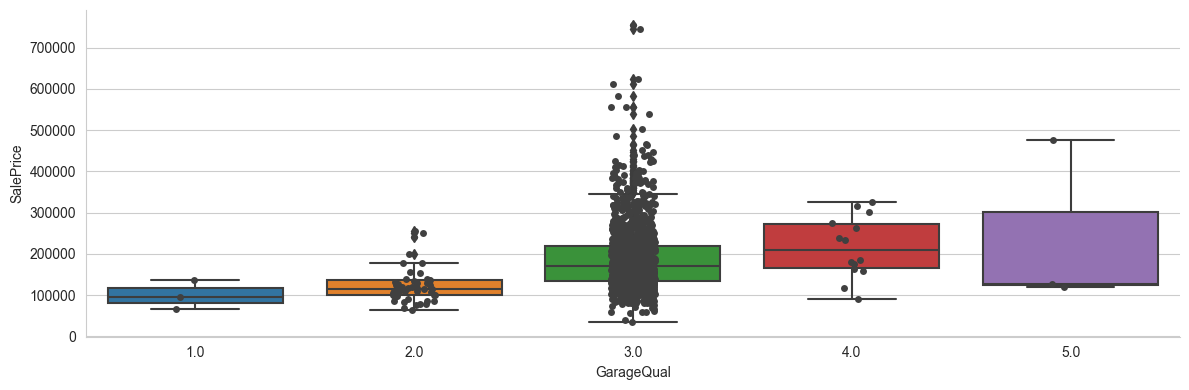

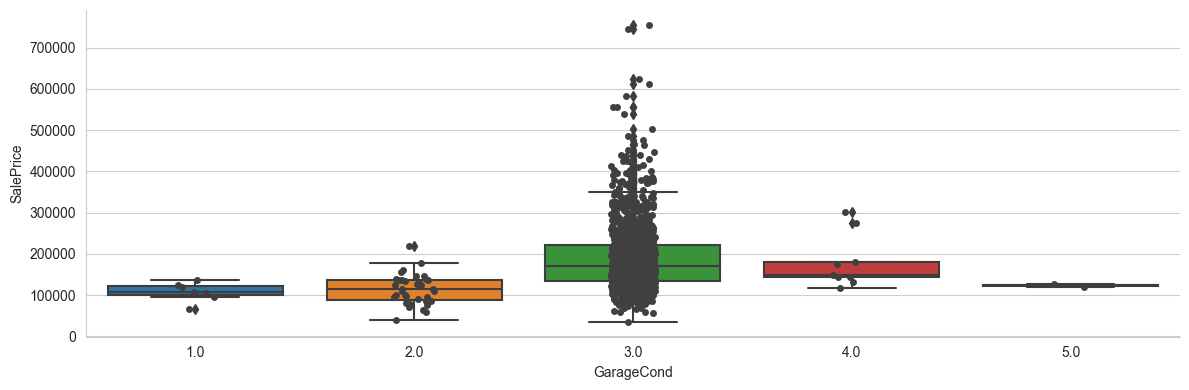

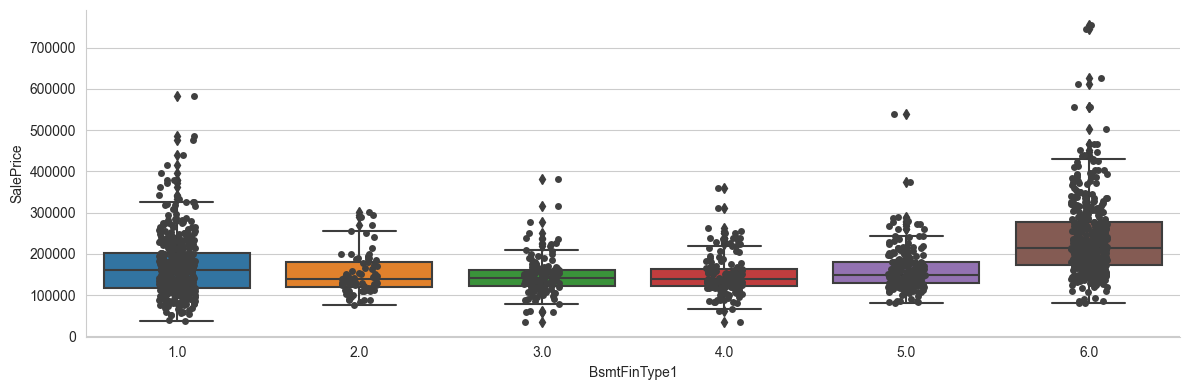

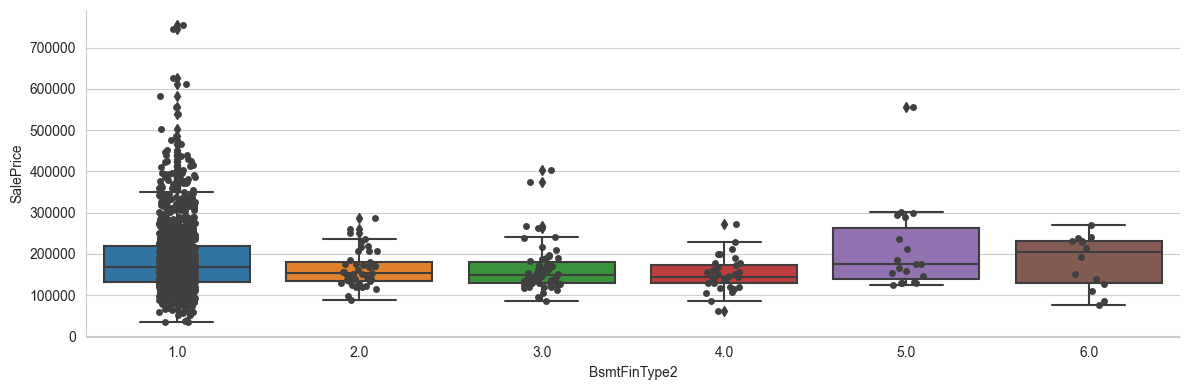

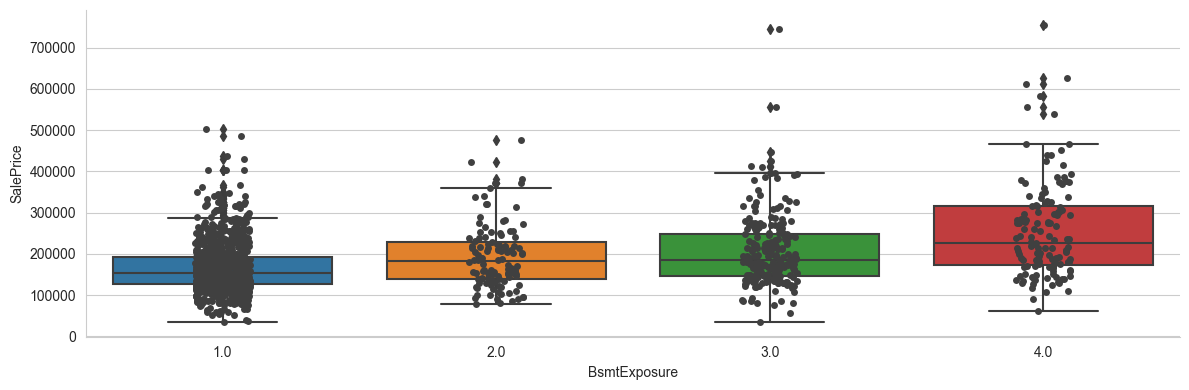

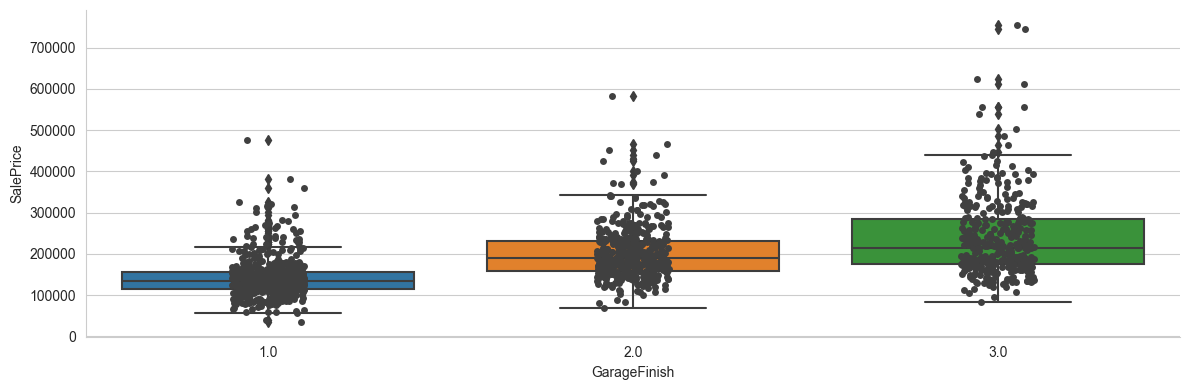

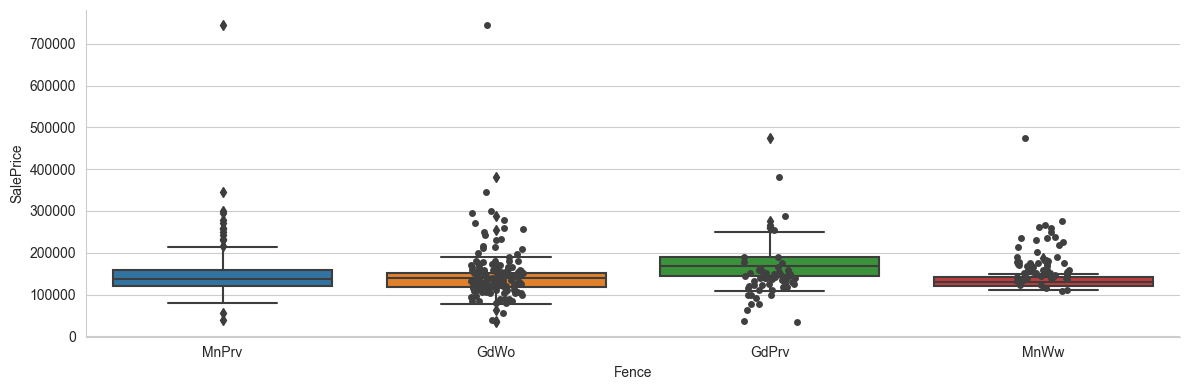

In [93]:
# let's plot the house mean sale price based on the quality of the various attributes
for var in qual_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=train_data, kind='box', height=4, aspect=3)
    # add jitter with stripplot
    sns.stripplot(x=var, y='SalePrice', data=train_data, jitter=True, color='0.25')
    plt.show();

For most attributes, the increase in the house price with the value of the variable, is quite clear.



In [94]:
# capture the remaining categorical variables (those which we didn't remap)

cat_others = [ var for var in cat_vars if var not in qual_vars]
len(cat_others)

30

## 5.3 Rare labels


In [95]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    tmp = df.groupby(var)['SalePrice'].count() / len(df)

    return tmp[tmp < rare_perc]

In [99]:
# print the rare categories for each of the categorical variables (less than 1% of observations)
for var in cat_others:
    print(analyse_rare_labels(train_data, var, 0.01))
    print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

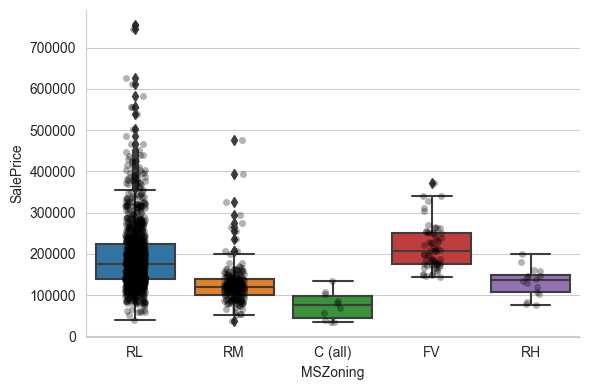

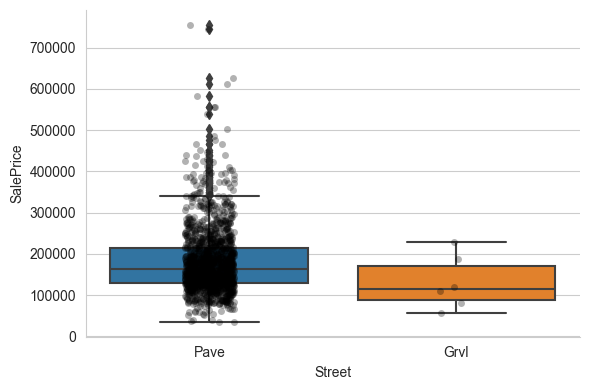

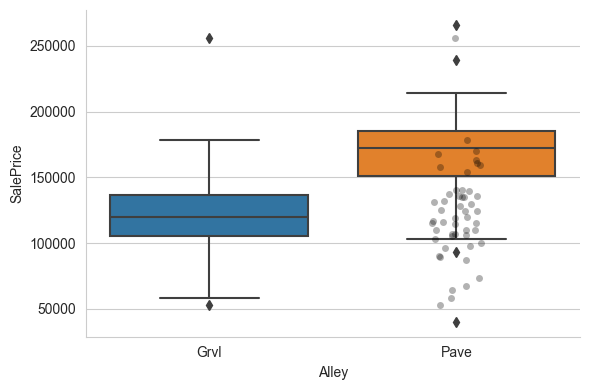

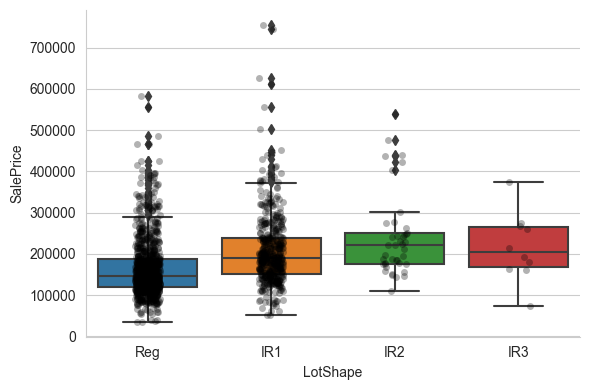

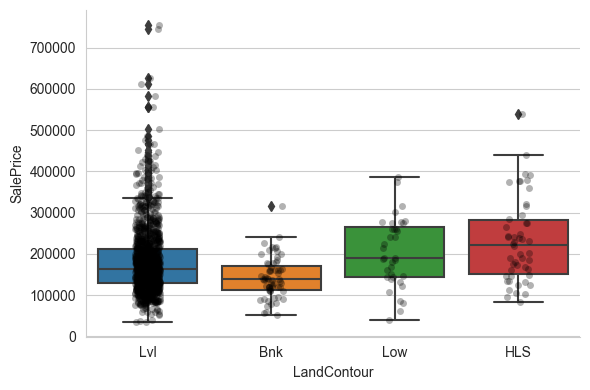

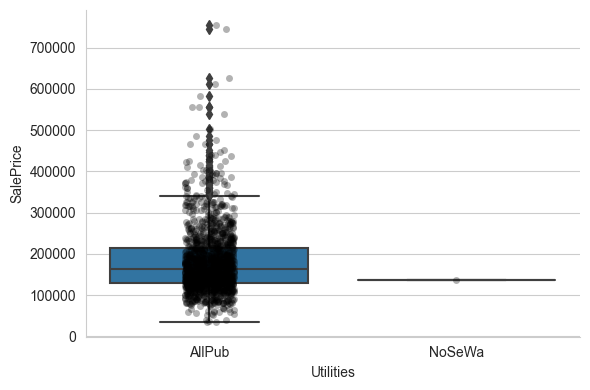

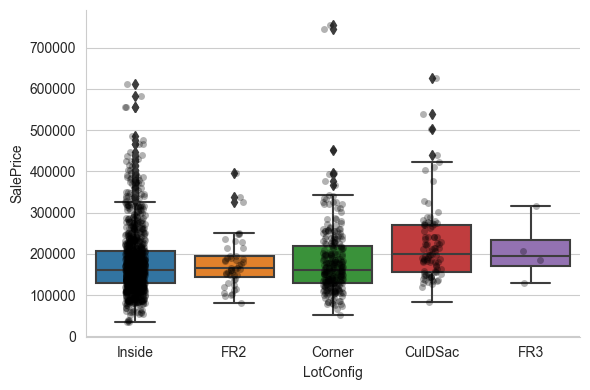

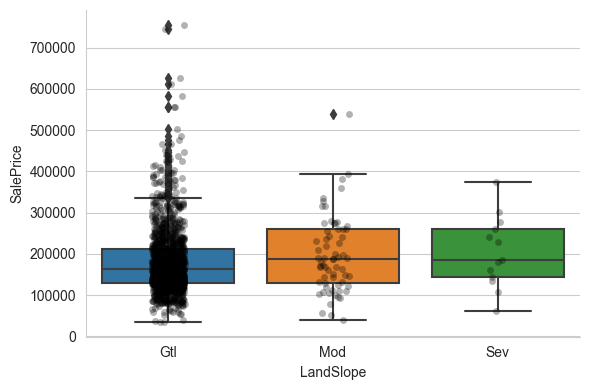

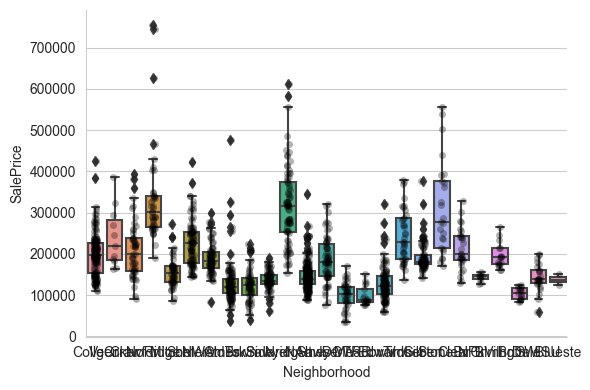

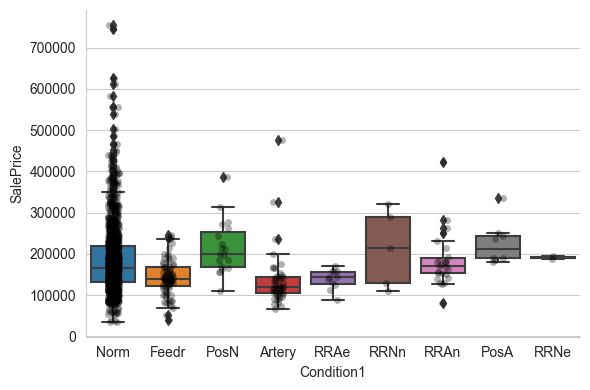

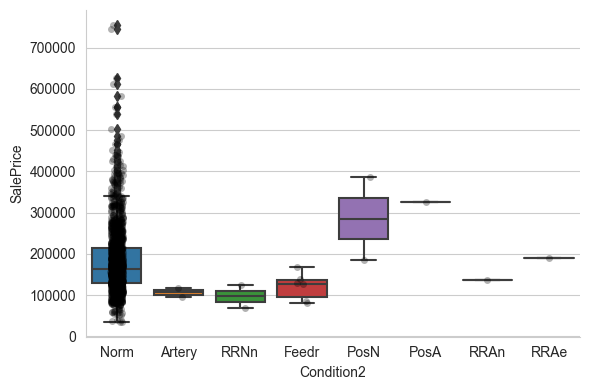

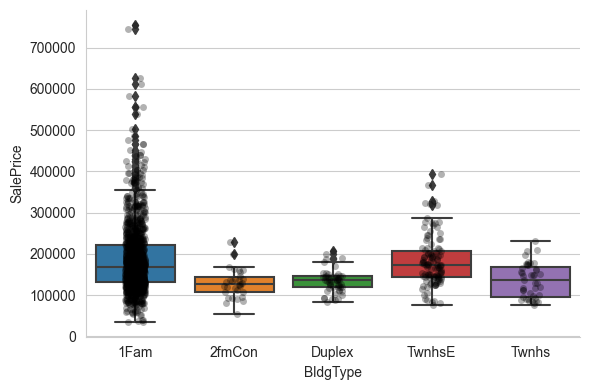

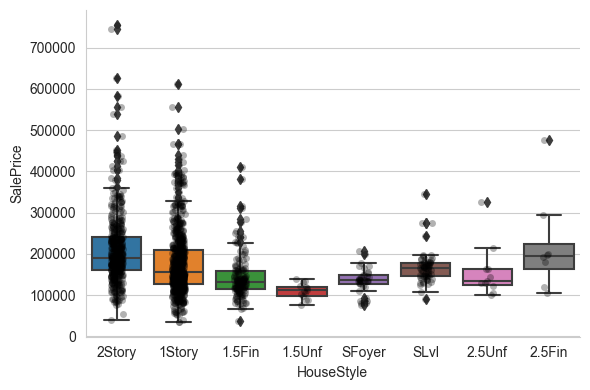

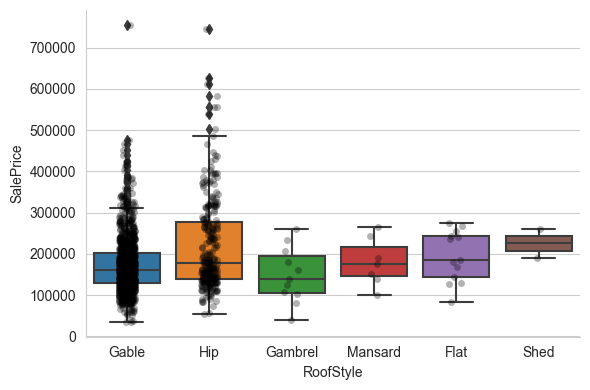

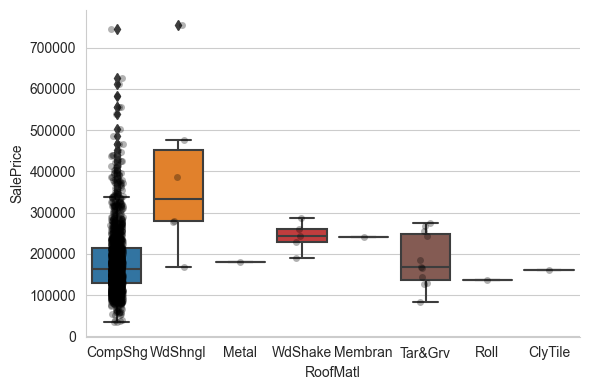

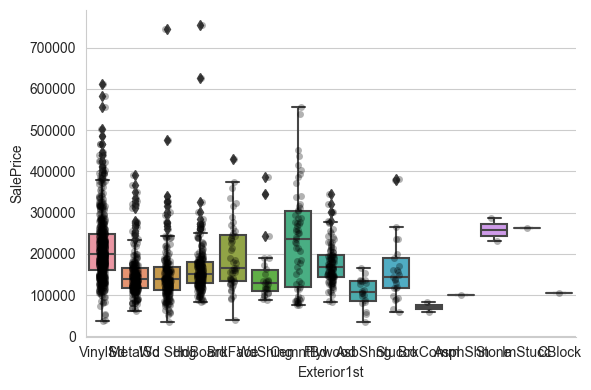

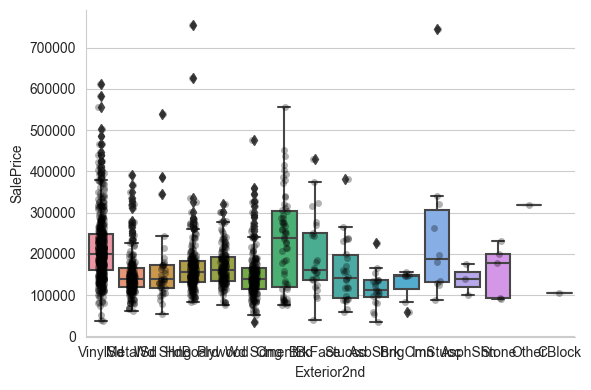

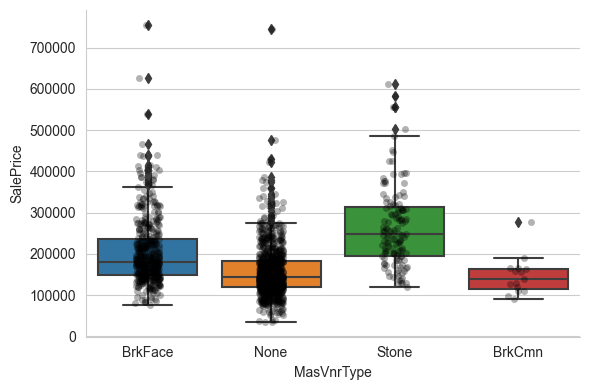

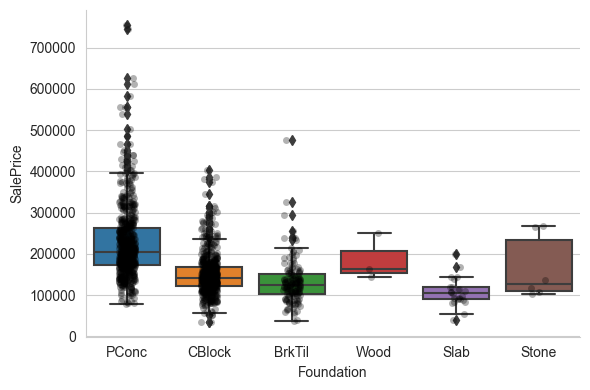

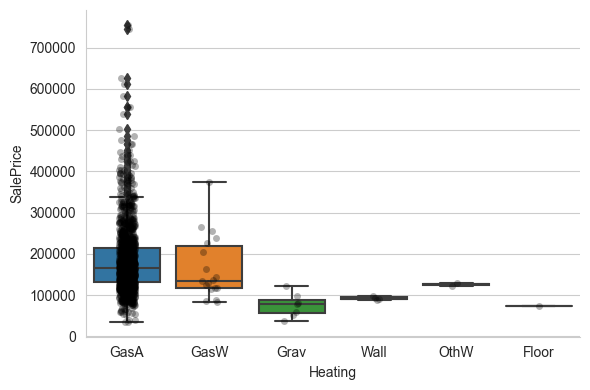

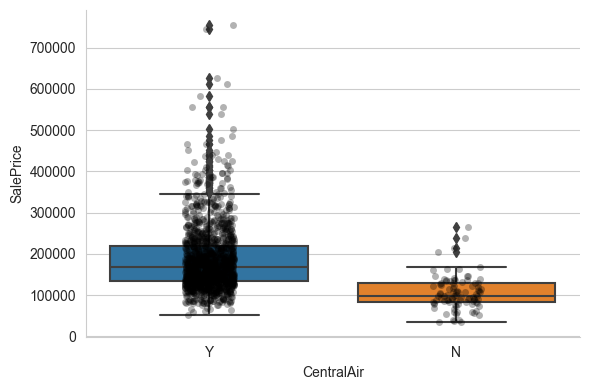

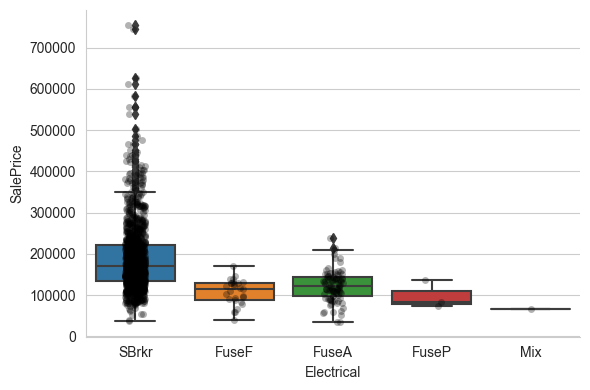

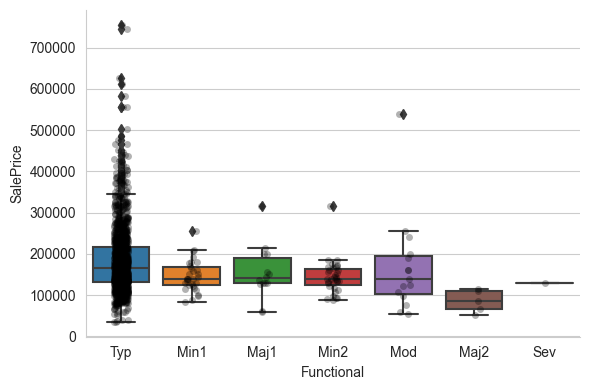

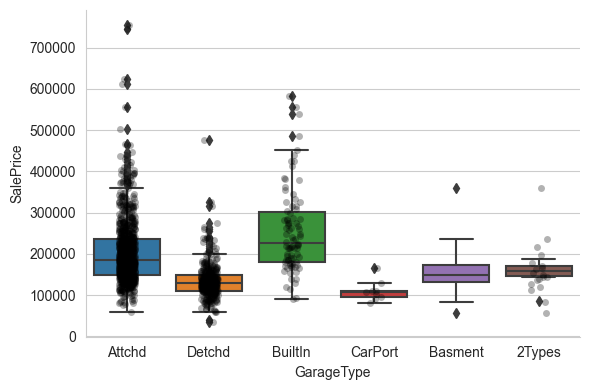

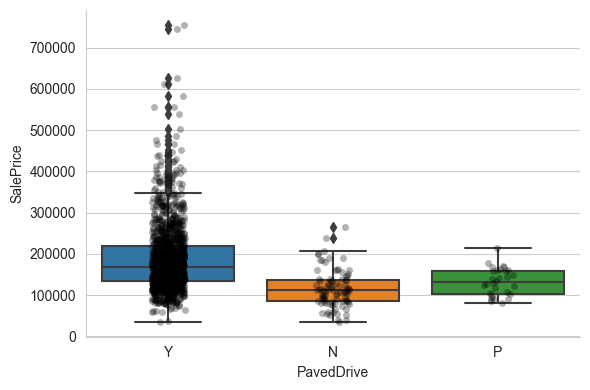

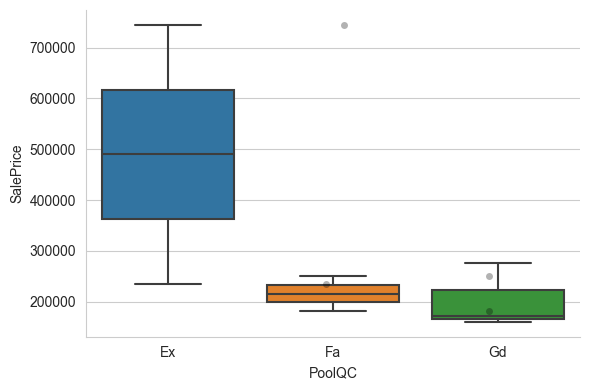

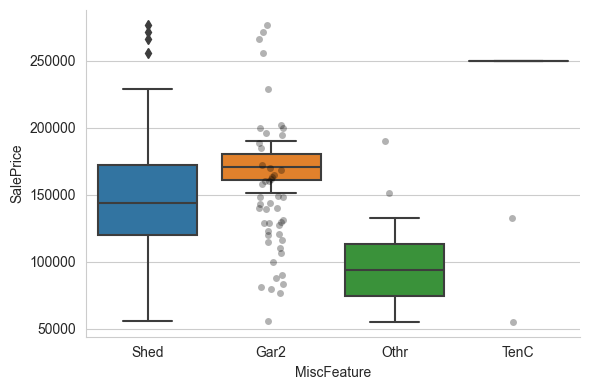

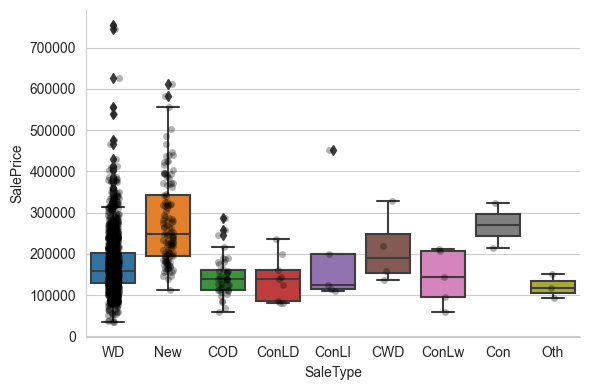

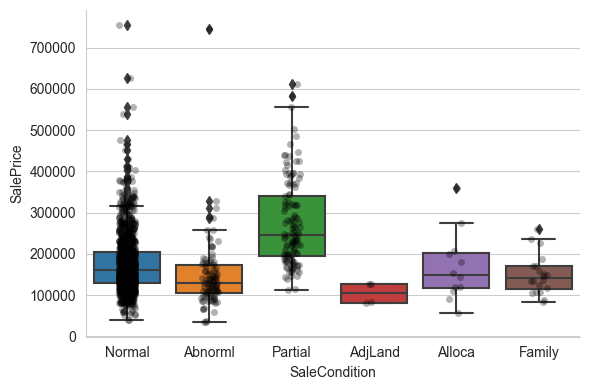

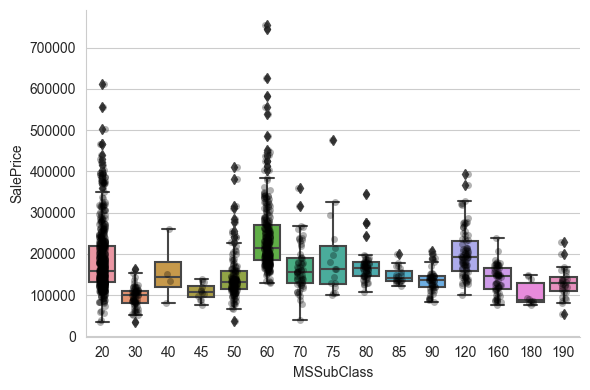

In [100]:
for var in cat_others:
    # make boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=train_data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=train_data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

# Additional Resources
- Feature Engineering for Machine Learning - Online Course
- [Packt Feature Engineering Cookbook](https://www.amazon.com/Python-Feature-Engineering-Cookbook-transforming-dp-1804611301/dp/1804611301) - Book
- [Predict house price with Feature-engine](https://www.kaggle.com/solegalli/predict-house-price-with-feature-engine) - Kaggle kernel
- Comprehensive data exploration with Python - Kaggle kernel
- [How I made top 0.3% on a Kaggle competition](https://www.kaggle.com/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition) - Kaggle kernel